In [141]:
#importing required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [142]:
df= pd.read_csv("https://raw.githubusercontent.com/mohittomar2008/Rainfall-Prediction---Weather-Forecasting/main/weatherAUS.csv")

In [143]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [145]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,8350.0,13.193305,5.403596,-2.0,9.20,13.3,17.4,28.5
MaxTemp,8365.0,23.859976,6.136408,8.2,19.30,23.3,28.0,45.5
Rainfall,8185.0,2.805913,10.459379,0.0,0.00,0.0,1.0,371.0
Evaporation,4913.0,5.389395,5.044484,0.0,2.60,4.6,7.0,145.0
Sunshine,4431.0,7.632205,3.896235,0.0,4.75,8.7,10.7,13.9
WindGustSpeed,7434.0,40.174469,14.665721,7.0,30.00,39.0,50.0,107.0
WindSpeed9am,8349.0,13.847646,10.174579,0.0,6.00,13.0,20.0,63.0
WindSpeed3pm,8318.0,18.533662,9.766986,0.0,11.00,19.0,24.0,83.0
Humidity9am,8366.0,67.822496,16.833283,10.0,56.00,68.0,80.0,100.0
Humidity3pm,8323.0,51.249790,18.423774,6.0,39.00,51.0,63.0,99.0


In [146]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [147]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

<AxesSubplot:>

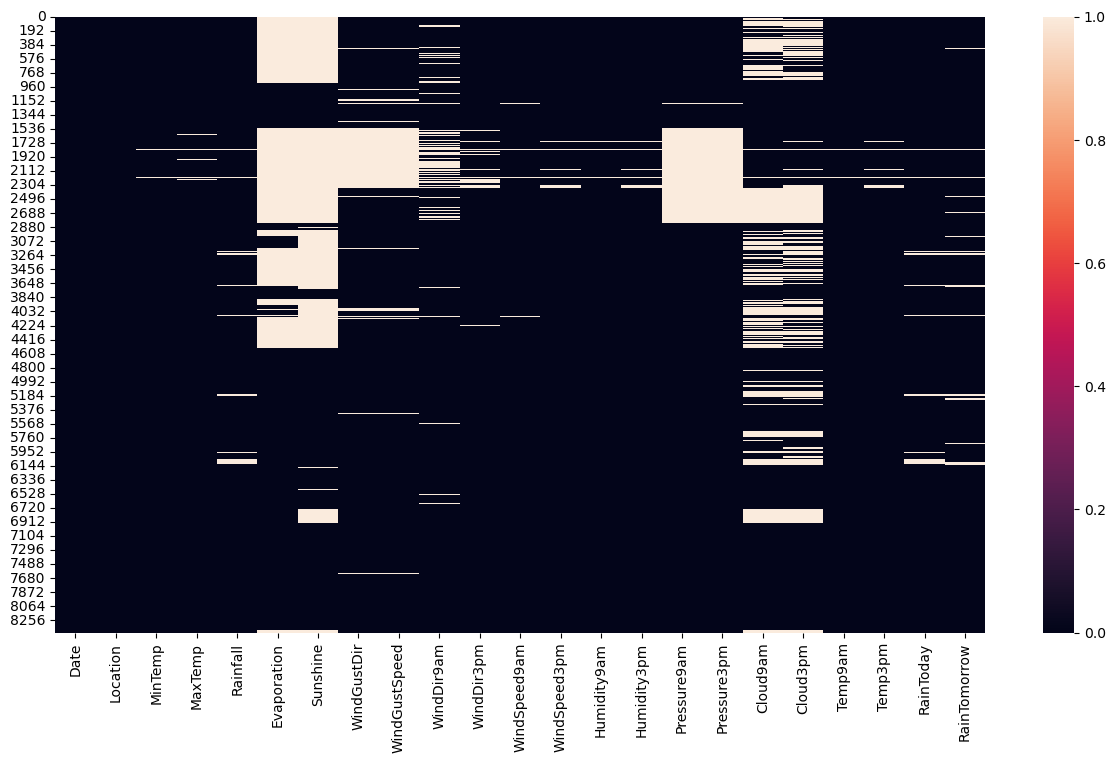

In [148]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

we can observe many missing values from the above heatmap

In [149]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [150]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [151]:
catg_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [152]:
cont_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

([<matplotlib.patches.Wedge at 0x1e3d63eef40>,
 [Text(0.6343483909086429, 0.8986668564888858, 'Categorical'),
  Text(-0.6343483909086428, -0.8986668564888859, 'Continuous')],
 [Text(0.3460082132228961, 0.4901819217212104, '30.4%'),
  Text(-0.34600821322289604, -0.49018192172121045, '69.6%')])

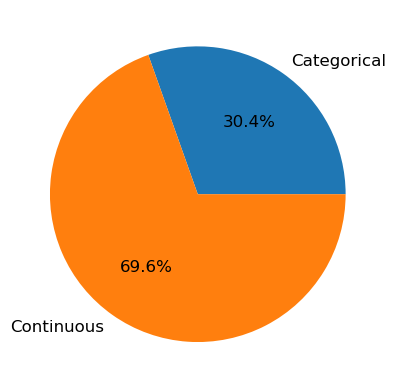

In [153]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

In [154]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [155]:
df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

No     73.531157
Yes    23.632047
NaN     2.836795
Name: RainTomorrow, dtype: float64

In [156]:
target_df=df['RainTomorrow'].value_counts(normalize=True,dropna=False)*100

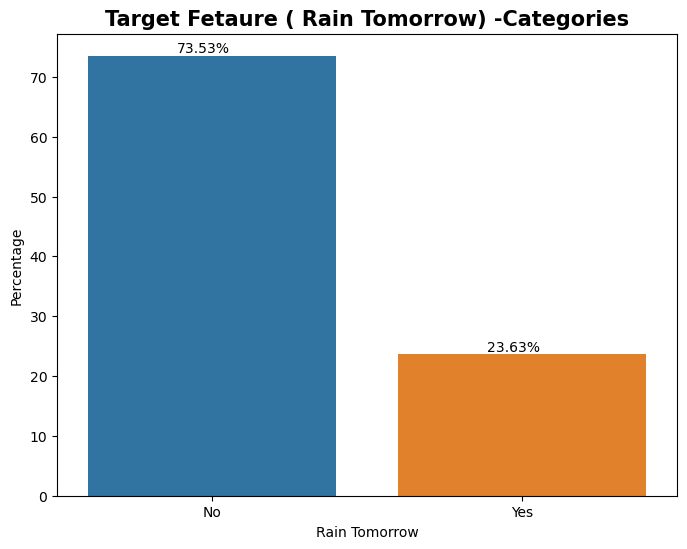

In [157]:
plt.figure(figsize=(8,6))
plt.title("Target Fetaure ( Rain Tomorrow) -Categories",fontweight='bold',fontsize=15)
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Rain Tomorrow')
plt.ylabel('Percentage')



for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x +width/2.8,height+.5,f'{height:.2f}%')

In [158]:
df['Date'].nunique()

3004

In [159]:
df['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [160]:
df['Location'].value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

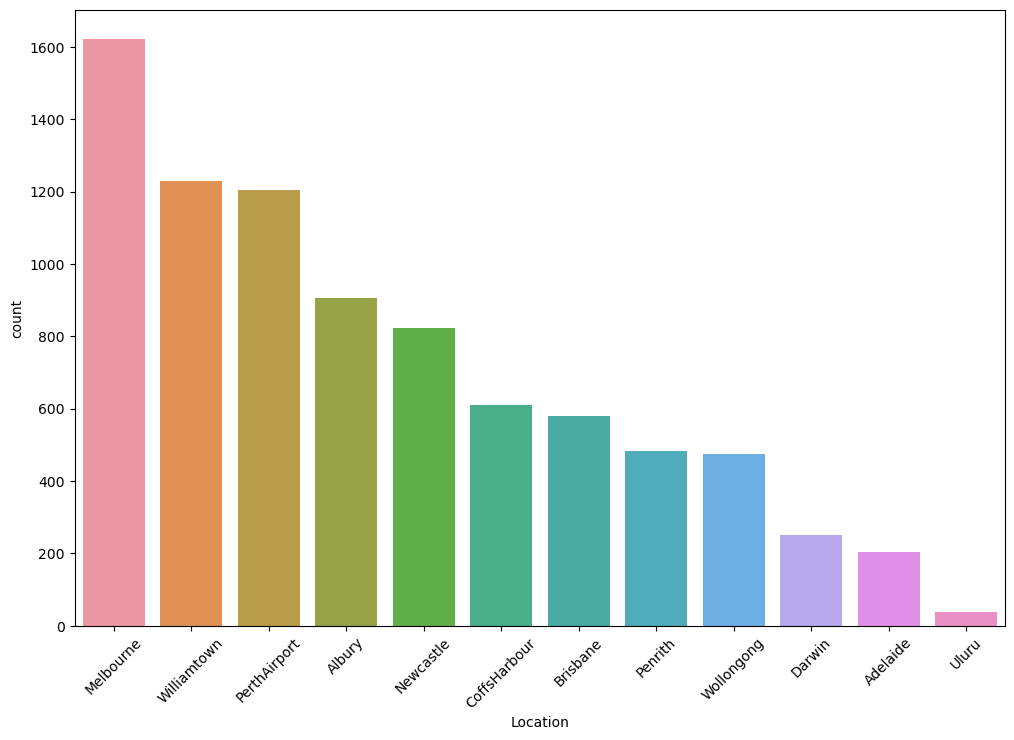

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

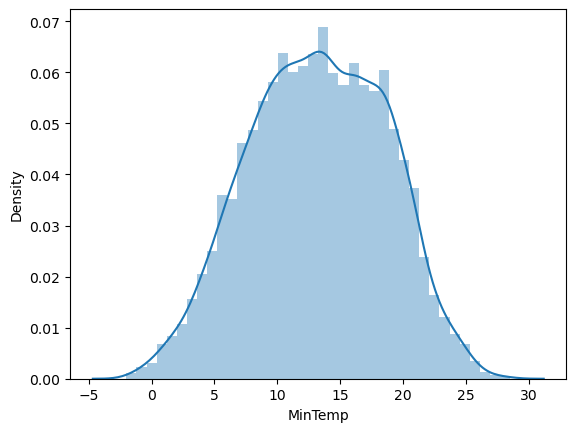

In [162]:
sns.distplot(df['MinTemp'])

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

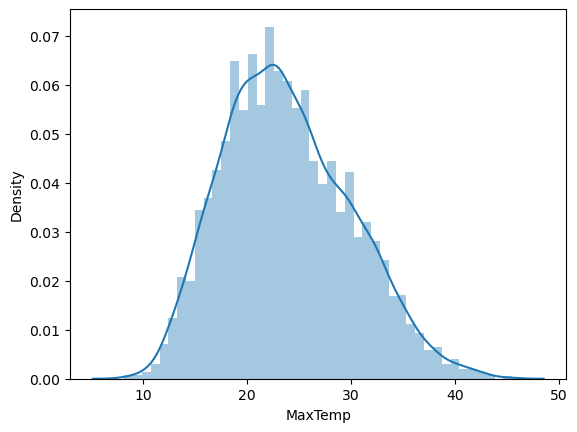

In [163]:
sns.distplot(df['MaxTemp'])

In [164]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

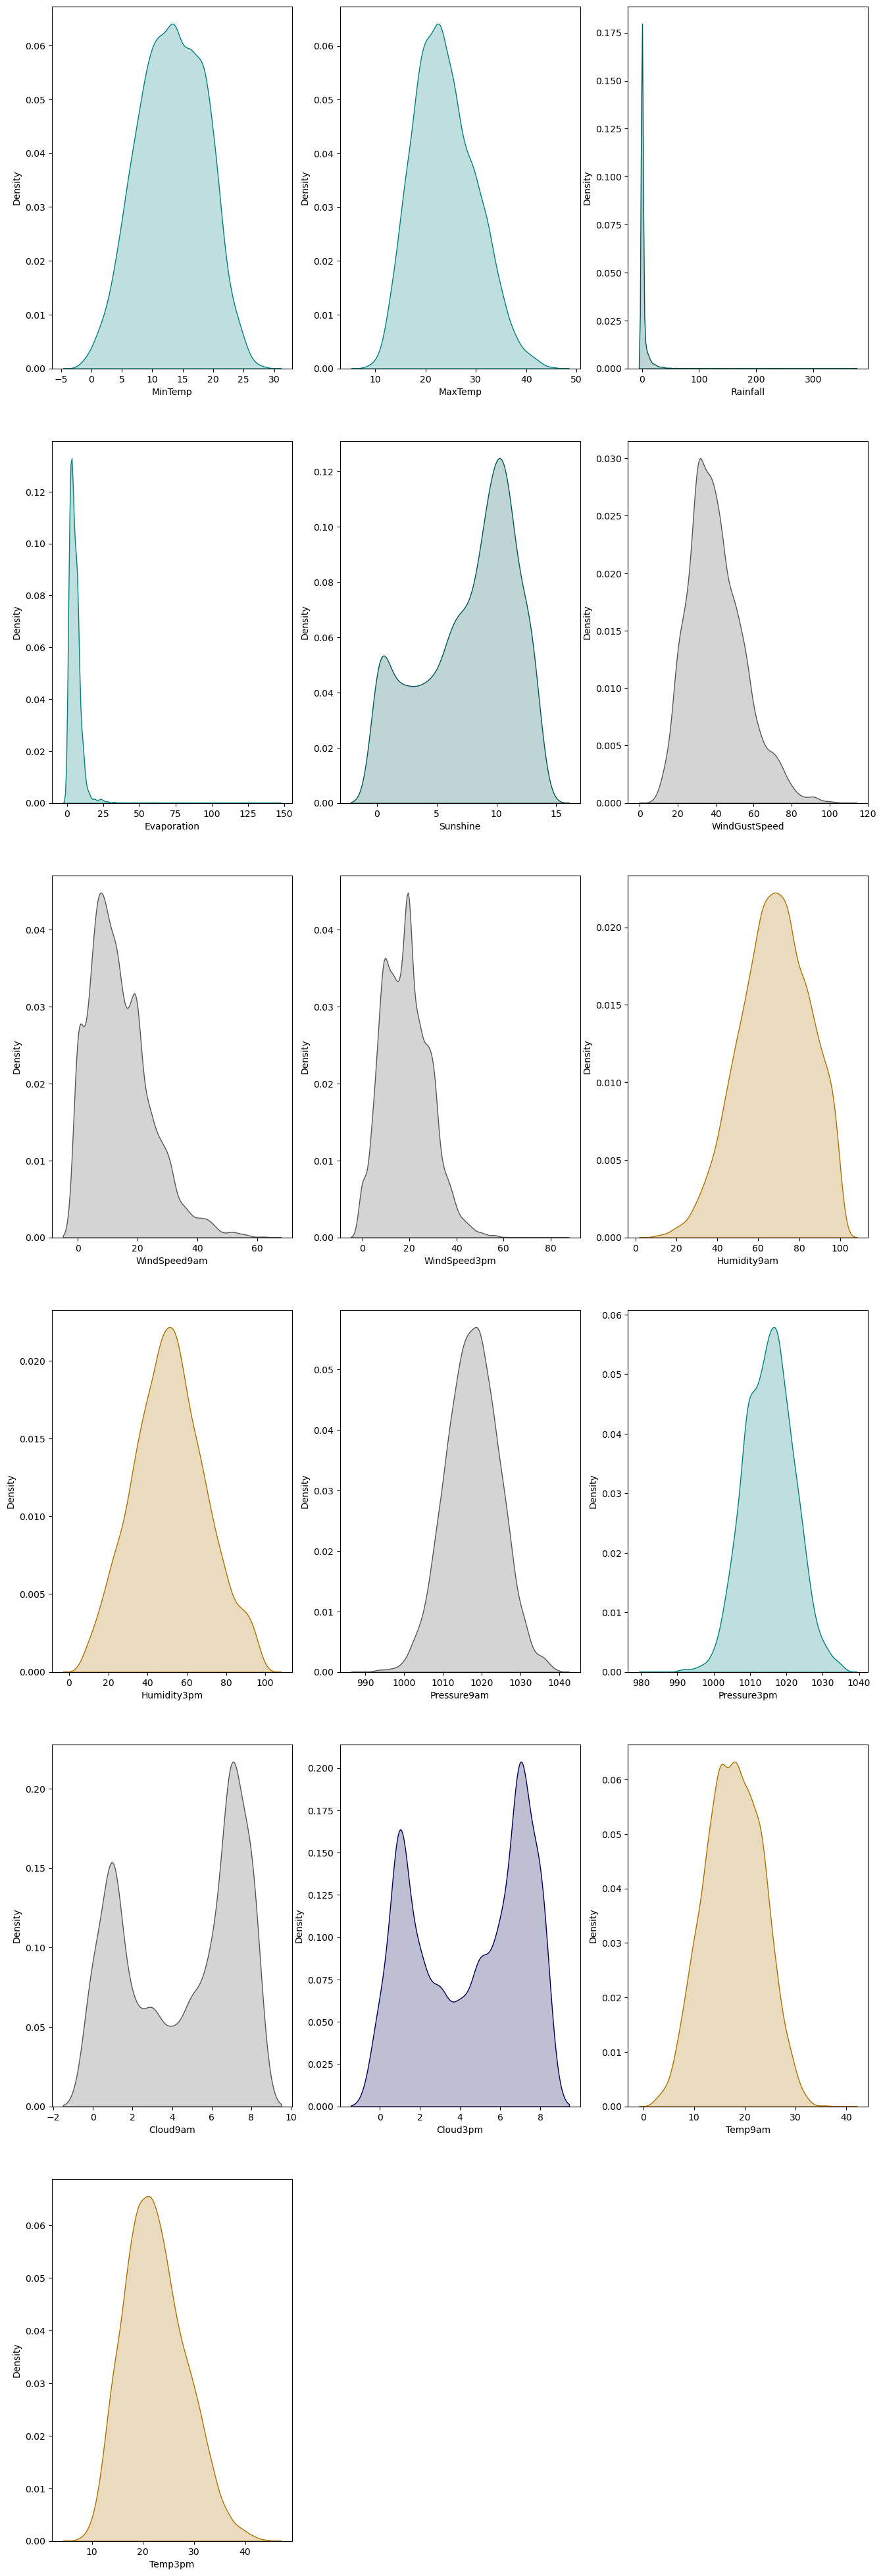

In [165]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

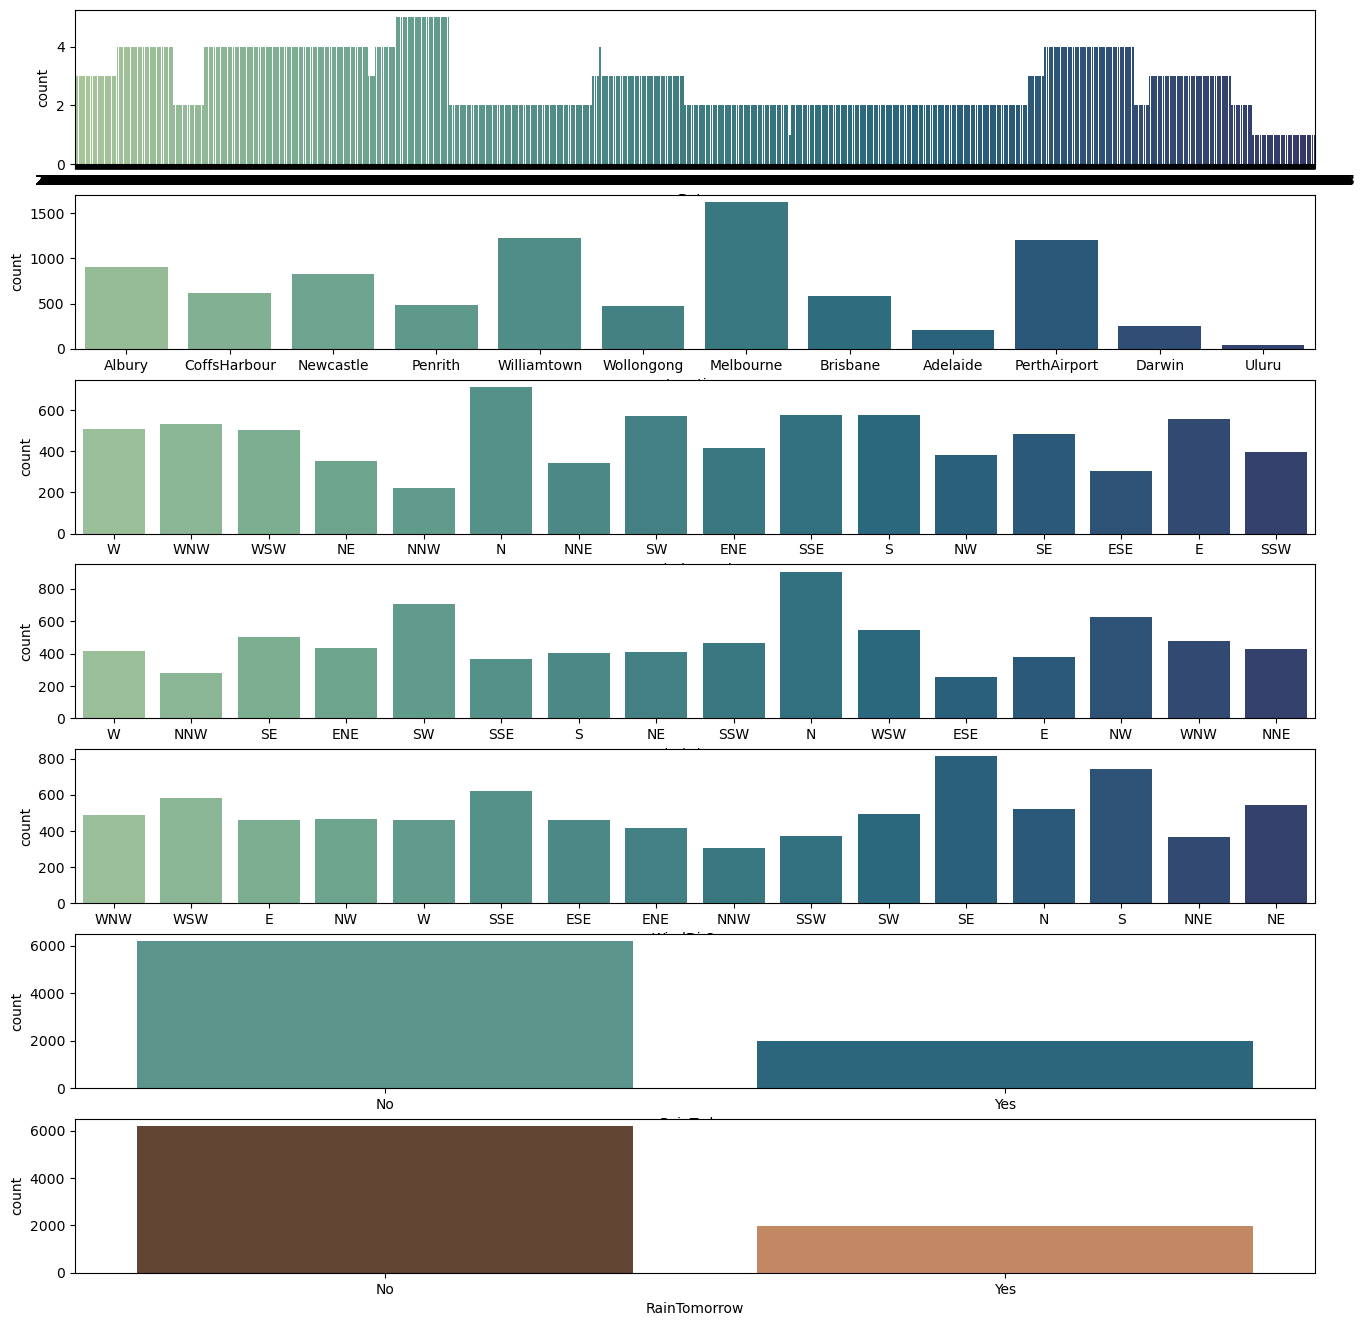

In [166]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[catg_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(21,1,i+1)
    
    sns.countplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

In [167]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Melbourne'),
  Text(1, 0, 'Williamtown'),
  Text(2, 0, 'PerthAirport'),
  Text(3, 0, 'Albury'),
  Text(4, 0, 'Newcastle'),
  Text(5, 0, 'CoffsHarbour'),
  Text(6, 0, 'Brisbane'),
  Text(7, 0, 'Penrith'),
  Text(8, 0, 'Wollongong'),
  Text(9, 0, 'Darwin'),
  Text(10, 0, 'Adelaide'),
  Text(11, 0, 'Uluru')])

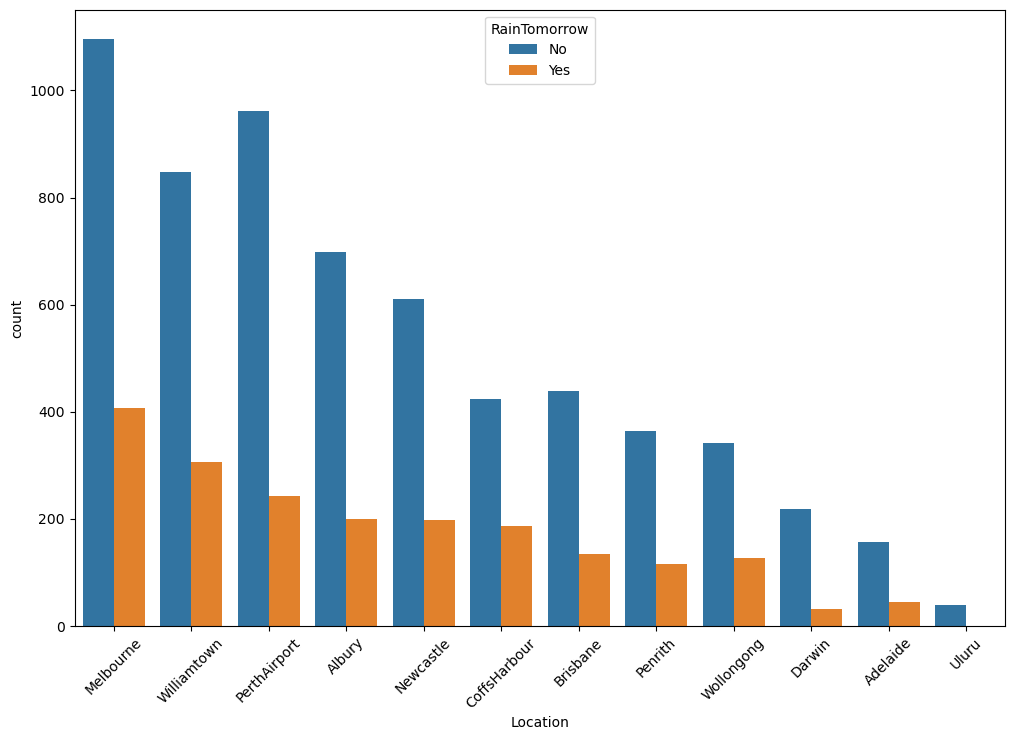

In [168]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'],order=df['Location'].value_counts().index,hue=df['RainTomorrow'])
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Location'>

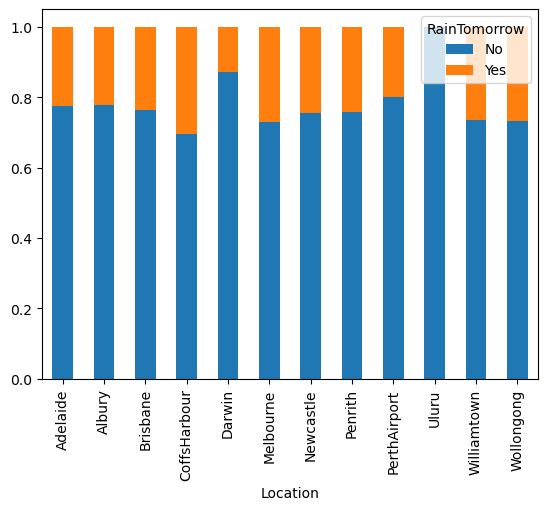

In [169]:
table=pd.crosstab(df['Location'],df['RainTomorrow'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

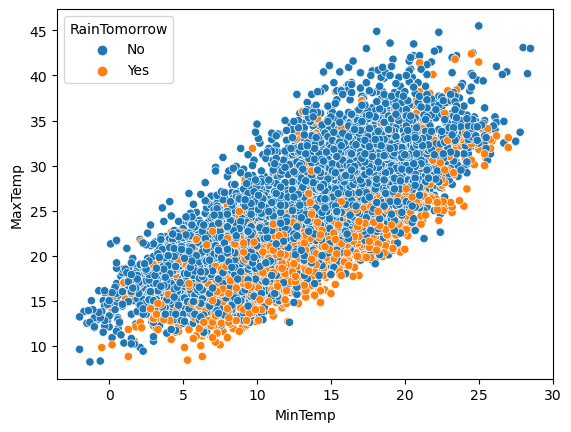

In [170]:
sns.scatterplot(df['MinTemp'],df['MaxTemp'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

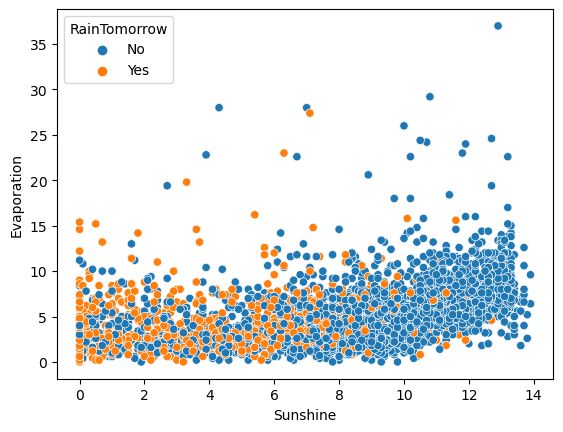

In [171]:
sns.scatterplot(df['Sunshine'],df['Evaporation'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindGustSpeed', ylabel='WindGustDir'>

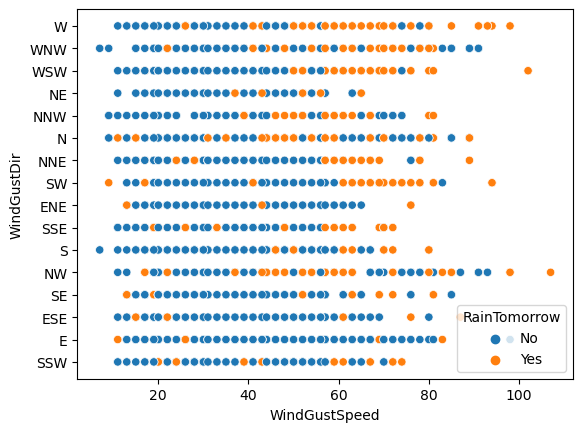

In [172]:
sns.scatterplot(df['WindGustSpeed'],df['WindGustDir'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='WindDir9am'>

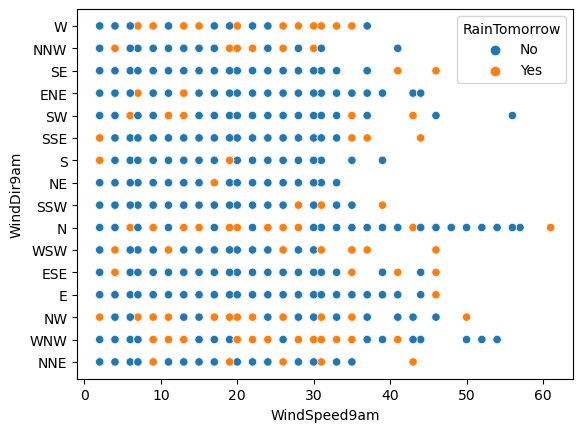

In [173]:
sns.scatterplot(df['WindSpeed9am'],df['WindDir9am'],hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='WindDir3pm'>

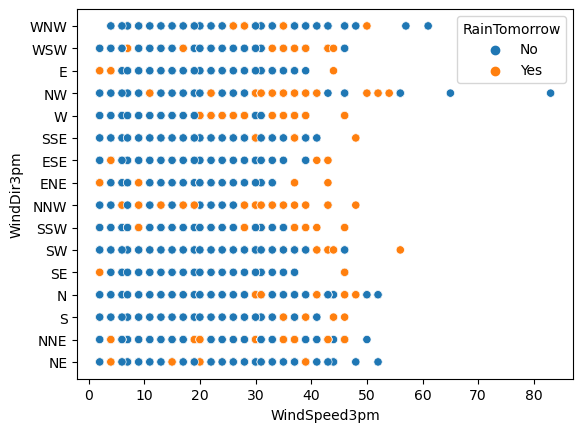

In [174]:
sns.scatterplot(df['WindSpeed3pm'],df['WindDir3pm'],hue='RainTomorrow',data=df)

In [175]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:xlabel='Humidity3pm', ylabel='Humidity9am'>

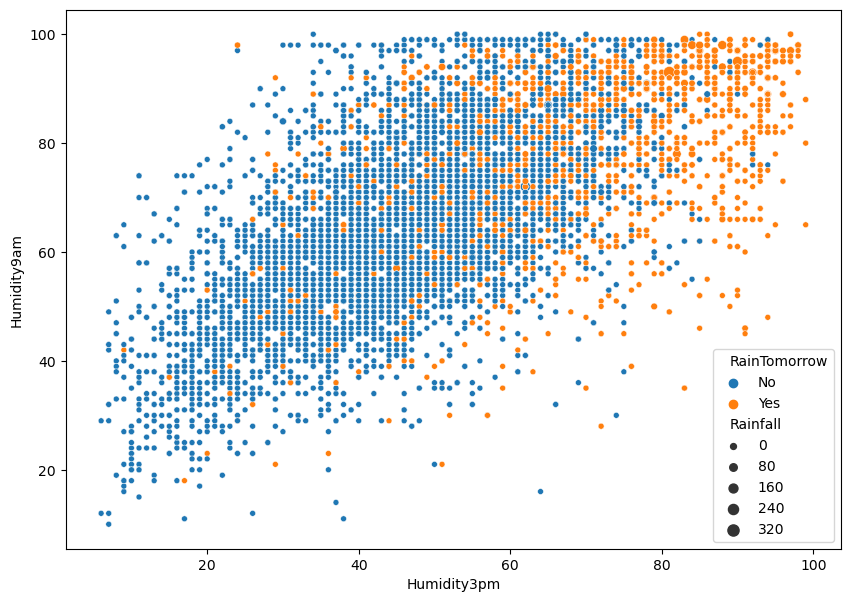

In [176]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['Humidity3pm'],df['Humidity9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

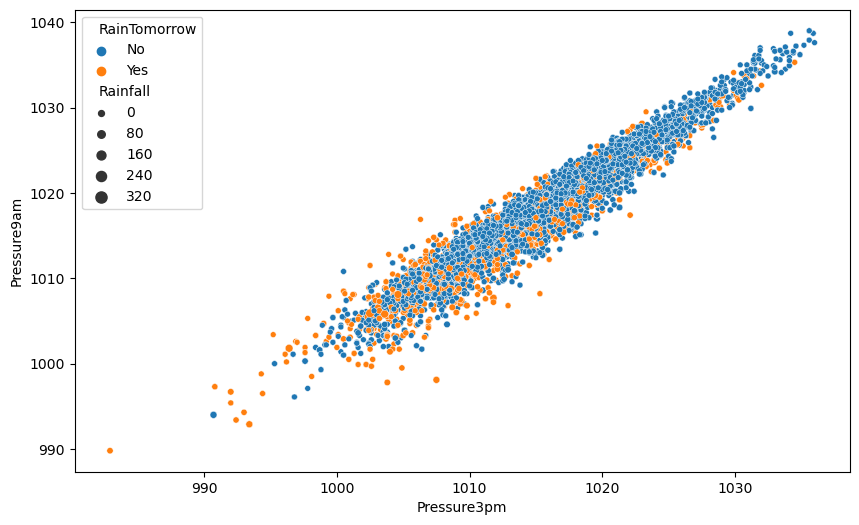

In [177]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Pressure3pm'],df['Pressure9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Cloud9am'>

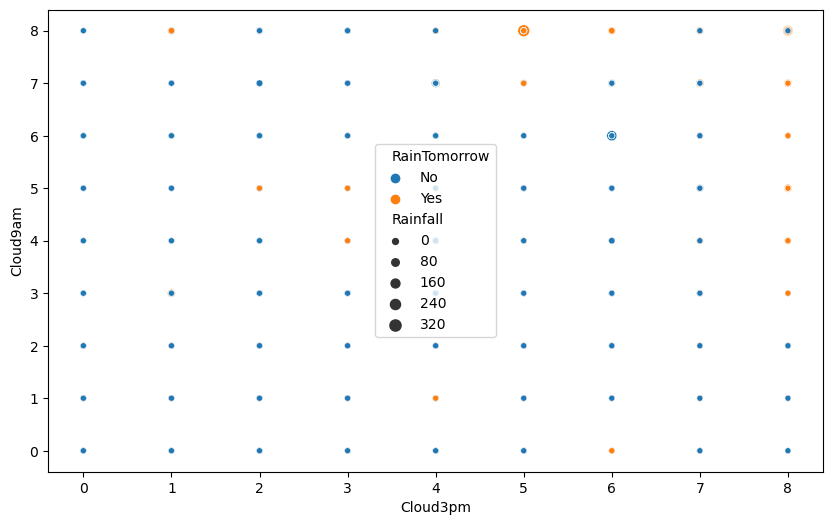

In [178]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Cloud3pm'],df['Cloud9am'],hue='RainTomorrow',size='Rainfall',data=df)

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

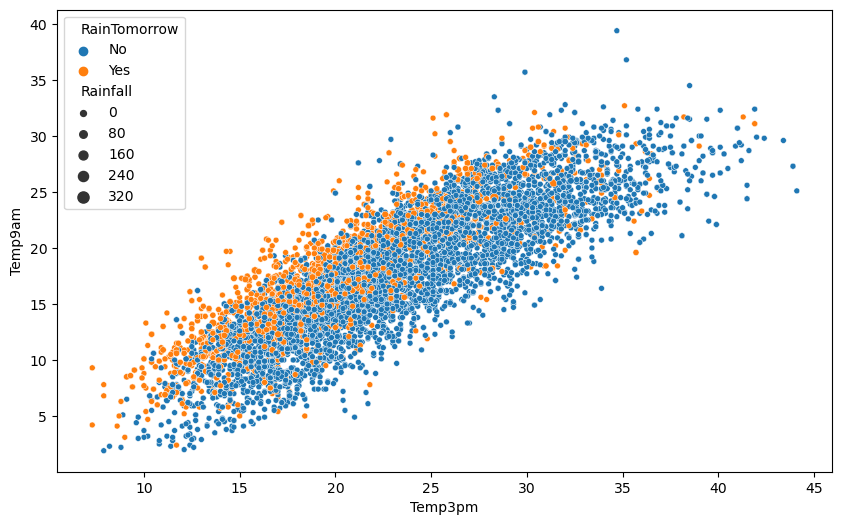

In [179]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Temp3pm'],df['Temp9am'],hue='RainTomorrow',size='Rainfall',data=df)

In [180]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [181]:
df.groupby('RainToday')['RainTomorrow'].value_counts()

RainToday  RainTomorrow
No         No              5142
           Yes              978
Yes        No              1013
           Yes              946
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainToday', ylabel='count'>

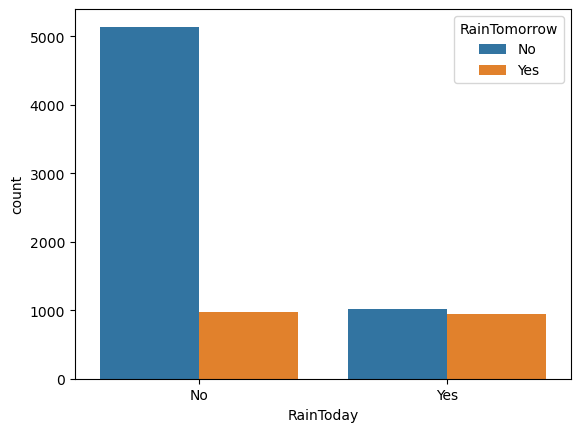

In [182]:
sns.countplot(df['RainToday'],hue=df['RainTomorrow'])

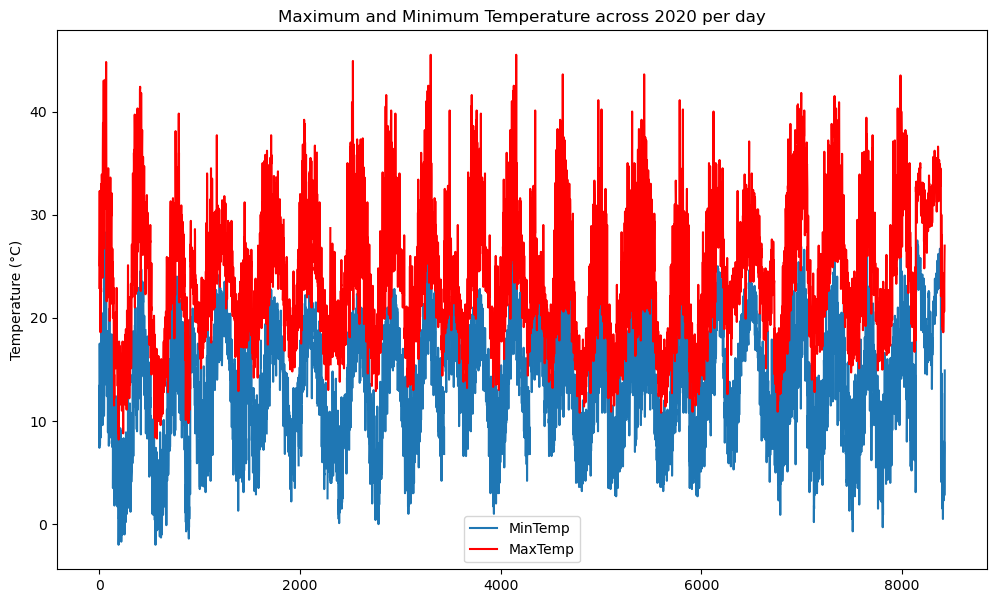

In [183]:
max_temp = df['MaxTemp']
min_temp = df['MinTemp']

min_temp.plot(figsize=(12,7), legend=True)
max_temp.plot(figsize=(12,7), color='r', legend=True)
plt.title('Maximum and Minimum Temperature across 2020 per day')
plt.ylabel('Temperature (°C)')
plt.show()

<AxesSubplot:>

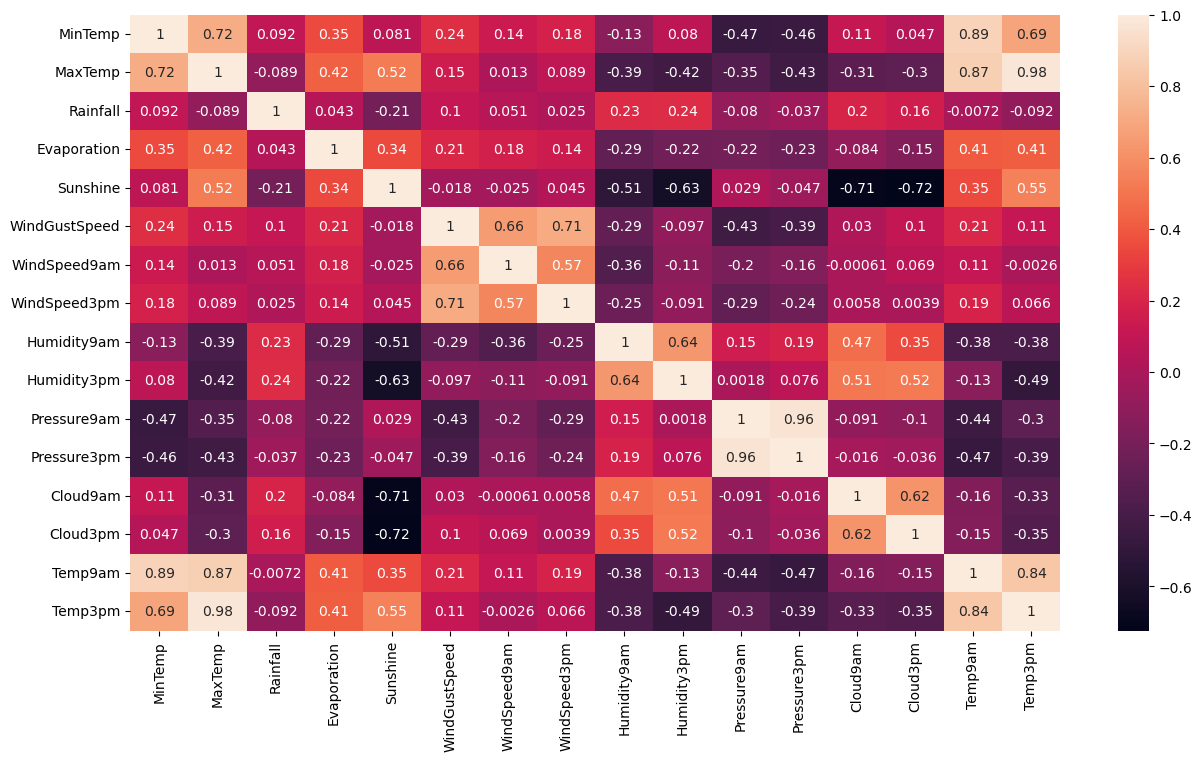

In [184]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [185]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [186]:
yes_rain = df[df['RainTomorrow']=='Yes']
no_rain = df[df['RainTomorrow']=='No']

In [187]:
yes_rain.shape , no_rain.shape

((1991, 23), (6195, 23))

In [188]:
yes_rain['MinTemp'].fillna(yes_rain['MinTemp'].mode()[0],inplace=True)
no_rain['MinTemp'].fillna(no_rain['MinTemp'].mode()[0],inplace=True)

yes_rain['MaxTemp'].fillna(yes_rain['MaxTemp'].mode()[0],inplace=True)
no_rain['MaxTemp'].fillna(no_rain['MaxTemp'].mode()[0],inplace=True)

yes_rain['Temp9am'].fillna(yes_rain['Temp9am'].mode()[0],inplace=True)
no_rain['Temp9am'].fillna(no_rain['Temp9am'].mode()[0],inplace=True)

yes_rain['Temp3pm'].fillna(yes_rain['Temp3pm'].mode()[0],inplace=True)
no_rain['Temp3pm'].fillna(no_rain['Temp3pm'].mode()[0],inplace=True)


yes_rain['Humidity3pm'].fillna(yes_rain['Humidity3pm'].mode()[0],inplace=True)
no_rain['Humidity3pm'].fillna(no_rain['Humidity3pm'].mode()[0],inplace=True)

yes_rain['Humidity9am'].fillna(yes_rain['Humidity9am'].mode()[0],inplace=True)
no_rain['Humidity9am'].fillna(no_rain['Humidity9am'].mode()[0],inplace=True)

In [189]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Sunshine         47.41
Evaporation      41.69
Cloud3pm         29.14
Cloud9am         28.74
Pressure3pm      15.57
Pressure9am      15.54
WindGustDir      11.76
WindGustSpeed    11.76
WindDir9am        9.84
WindDir3pm        3.66
RainToday         2.85
Rainfall          2.85
RainTomorrow      2.84
WindSpeed3pm      1.27
Humidity3pm       1.21
Temp3pm           1.14
WindSpeed9am      0.90
MinTemp           0.89
MaxTemp           0.71
Humidity9am       0.70
Temp9am           0.66
Location          0.00
Date              0.00
dtype: float64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [191]:
yes_rain['Sunshine'].fillna(yes_rain['Sunshine'].median(),inplace=True)
no_rain['Sunshine'].fillna(no_rain['Sunshine'].median(),inplace=True)

yes_rain['Evaporation'].fillna(yes_rain['Evaporation'].median(),inplace=True)
no_rain['Evaporation'].fillna(no_rain['Evaporation'].median(),inplace=True)

yes_rain['Cloud3pm'].fillna(yes_rain['Cloud3pm'].median(),inplace=True)
no_rain['Cloud3pm'].fillna(no_rain['Cloud3pm'].median(),inplace=True)

yes_rain['Cloud9am'].fillna(yes_rain['Cloud9am'].median(),inplace=True)
no_rain['Cloud9am'].fillna(no_rain['Cloud9am'].median(),inplace=True)

yes_rain['Pressure3pm'].fillna(yes_rain['Pressure3pm'].median(),inplace=True)
no_rain['Pressure3pm'].fillna(no_rain['Pressure3pm'].median(),inplace=True)

yes_rain['Pressure9am'].fillna(yes_rain['Pressure9am'].median(),inplace=True)
no_rain['Pressure9am'].fillna(no_rain['Pressure9am'].median(),inplace=True)

yes_rain['WindGustDir'].fillna(yes_rain['WindGustDir'].mode()[0],inplace=True)
no_rain['WindGustDir'].fillna(no_rain['WindGustDir'].mode()[0],inplace=True)

yes_rain['WindGustSpeed'].fillna(yes_rain['WindGustSpeed'].median(),inplace=True)
no_rain['WindGustSpeed'].fillna(no_rain['WindGustSpeed'].median(),inplace=True)

yes_rain['WindDir9am'].fillna(yes_rain['WindDir9am'].mode()[0],inplace=True)
no_rain['WindDir9am'].fillna(no_rain['WindDir9am'].mode()[0],inplace=True)

yes_rain['WindDir3pm'].fillna(yes_rain['WindDir3pm'].mode()[0],inplace=True)
no_rain['WindDir3pm'].fillna(no_rain['WindDir3pm'].mode()[0],inplace=True)

yes_rain['WindSpeed3pm'].fillna(yes_rain['WindSpeed3pm'].median(),inplace=True)
no_rain['WindSpeed3pm'].fillna(no_rain['WindSpeed3pm'].median(),inplace=True)

yes_rain['WindSpeed9am'].fillna(yes_rain['WindSpeed9am'].median(),inplace=True)
no_rain['WindSpeed9am'].fillna(no_rain['WindSpeed9am'].median(),inplace=True)

yes_rain['Rainfall'].fillna(yes_rain['Rainfall'].median(),inplace=True)
no_rain['Rainfall'].fillna(no_rain['Rainfall'].median(),inplace=True)

In [192]:
data= yes_rain.append(no_rain, ignore_index=True)

In [193]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,2017-06-20,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,4.0,4.0,9.4,20.9,No,No
8182,2017-06-21,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,4.0,4.0,10.1,22.4,No,No
8183,2017-06-22,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,4.0,4.0,10.9,24.5,No,No
8184,2017-06-23,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,4.0,4.0,12.5,26.1,No,No


In [194]:
data.dropna(inplace=True)

In [195]:
# Converting Date feature into datetime
data['Date']=pd.to_datetime(data['Date'])

In [196]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day
data.drop('Date',axis=1,inplace=True)

In [197]:
data


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,9.7,31.9,0.0,3.8,4.2,NNW,80.0,SE,NW,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,2008,12,9
1,Albury,13.4,30.4,0.0,3.8,4.2,N,30.0,SSE,ESE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,2008,12,11
2,Albury,15.9,21.7,2.2,3.8,4.2,NNE,31.0,NE,ENE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12
3,Albury,15.9,18.6,15.6,3.8,4.2,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,2008,12,13
4,Albury,14.1,20.9,0.0,3.8,4.2,ENE,22.0,SSW,E,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,2008,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,3.5,21.8,0.0,4.8,9.6,E,31.0,ESE,E,...,1021.2,4.0,4.0,9.4,20.9,No,No,2017,6,20
8182,Uluru,2.8,23.4,0.0,4.8,9.6,E,31.0,SE,ENE,...,1020.3,4.0,4.0,10.1,22.4,No,No,2017,6,21
8183,Uluru,3.6,25.3,0.0,4.8,9.6,NNW,22.0,SE,N,...,1019.1,4.0,4.0,10.9,24.5,No,No,2017,6,22
8184,Uluru,5.4,26.9,0.0,4.8,9.6,N,37.0,SE,WNW,...,1016.8,4.0,4.0,12.5,26.1,No,No,2017,6,23


In [198]:
d1=data

In [199]:
num=[col for col in data.columns if data[col].dtypes!='O']
num

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'year',
 'month',
 'day']

In [200]:

#to find multi collinearity
v=data[num]

In [201]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [203]:
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]

In [204]:
VIF

,features,vif
0,MinTemp,8.536558
1,MaxTemp,25.650652
2,Rainfall,1.131077
3,Evaporation,1.217936
4,Sunshine,2.137066
5,WindGustSpeed,2.353808
6,WindSpeed9am,2.030998
7,WindSpeed3pm,1.946039
8,Humidity9am,3.854017
9,Humidity3pm,5.579726


In [205]:
num.remove('Temp3pm')

In [206]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF


,features,vif
0,MinTemp,8.466862
1,MaxTemp,9.254373
2,Rainfall,1.129338
3,Evaporation,1.217434
4,Sunshine,2.137021
5,WindGustSpeed,2.342729
6,WindSpeed9am,2.030727
7,WindSpeed3pm,1.941617
8,Humidity9am,3.374870
9,Humidity3pm,3.788957


In [207]:
num.remove('Pressure9am')

In [208]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,8.282180
1,MaxTemp,8.650329
2,Rainfall,1.124425
3,Evaporation,1.216592
4,Sunshine,2.134751
5,WindGustSpeed,2.325879
6,WindSpeed9am,2.025740
7,WindSpeed3pm,1.930832
8,Humidity9am,3.374529
9,Humidity3pm,3.783076


In [209]:
num.remove('Temp9am')

In [210]:
v=data[num]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,4.222621
1,MaxTemp,4.951979
2,Rainfall,1.121856
3,Evaporation,1.215636
4,Sunshine,2.131929
5,WindGustSpeed,2.291850
6,WindSpeed9am,2.006285
7,WindSpeed3pm,1.879912
8,Humidity9am,2.349810
9,Humidity3pm,2.972785


In [211]:
data.drop(['Temp3pm','Temp9am','Pressure9am'],axis=1,inplace=True)

In [212]:
data.shape

(8079, 22)

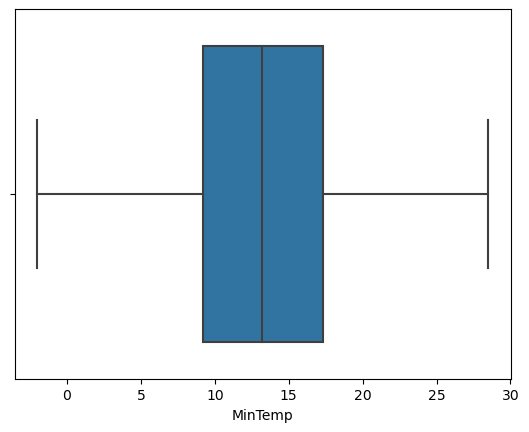

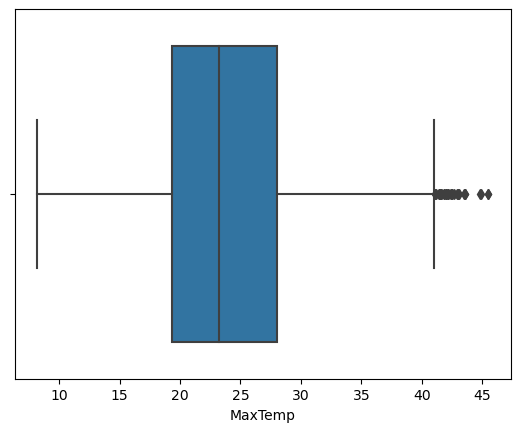

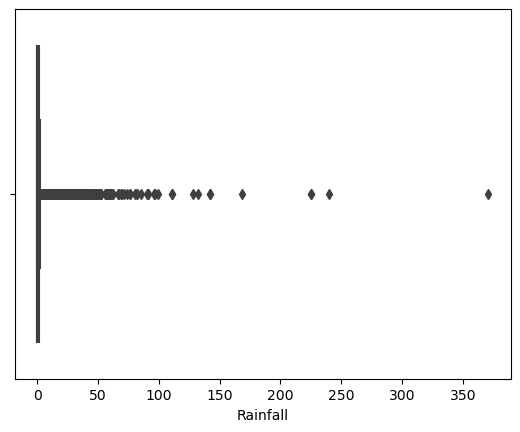

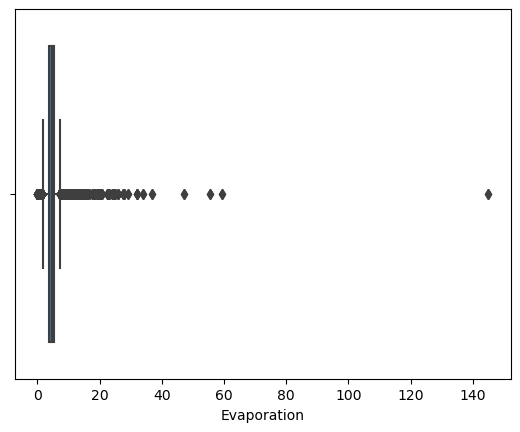

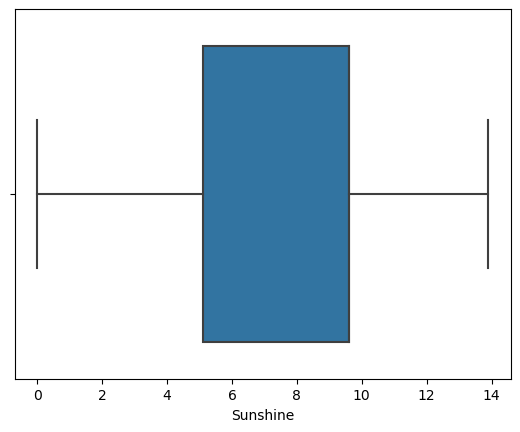

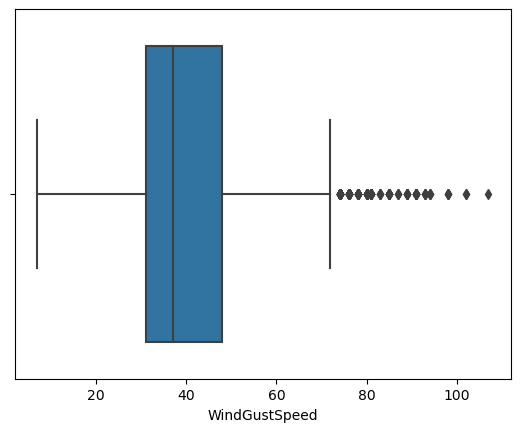

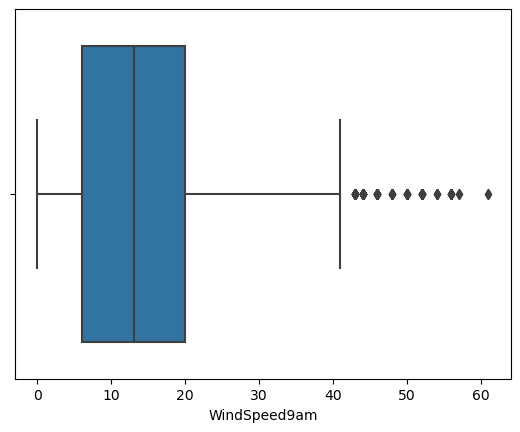

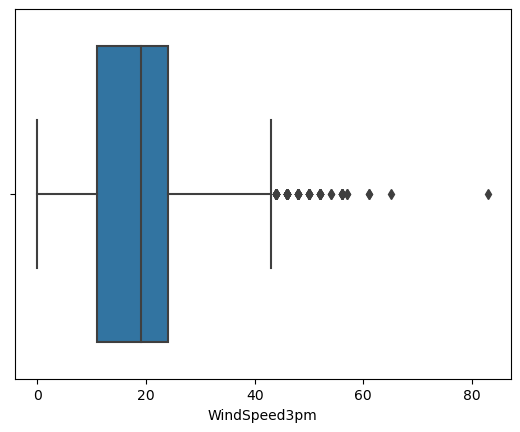

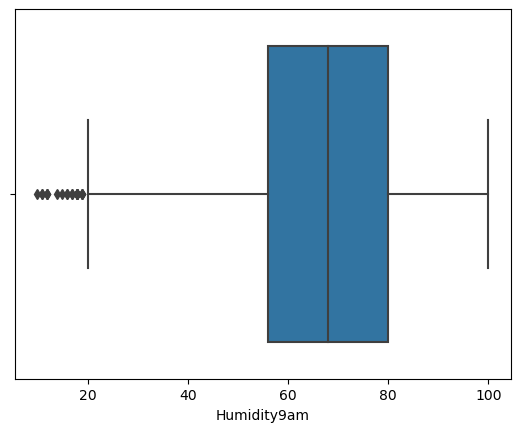

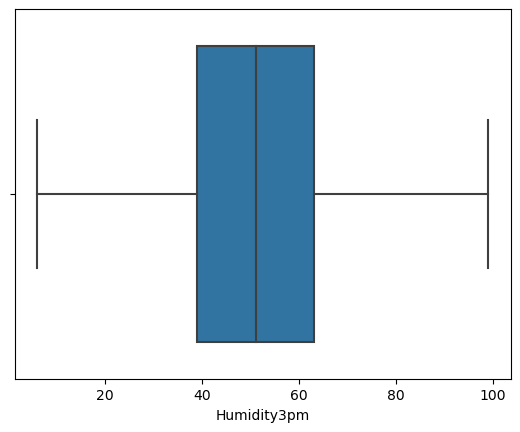

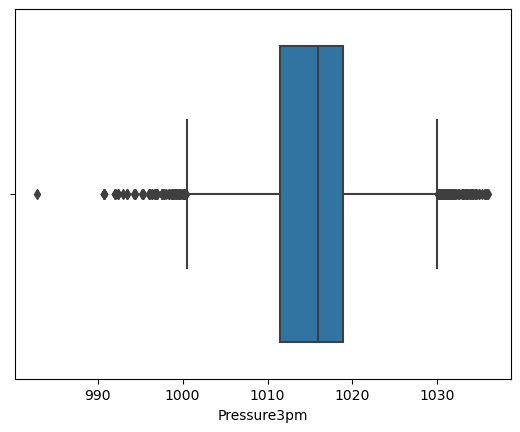

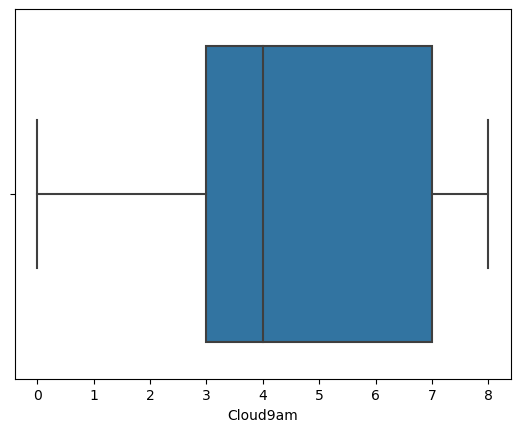

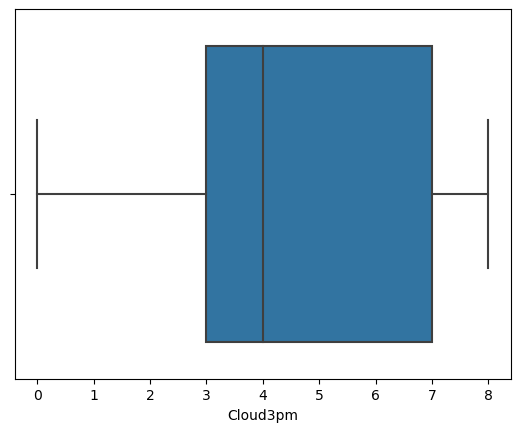

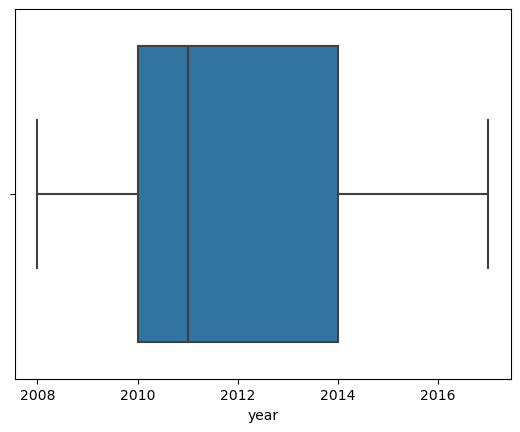

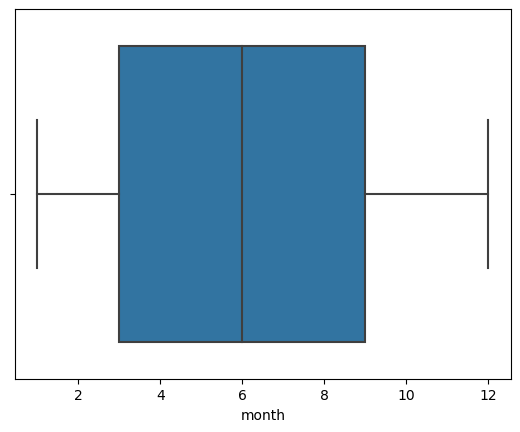

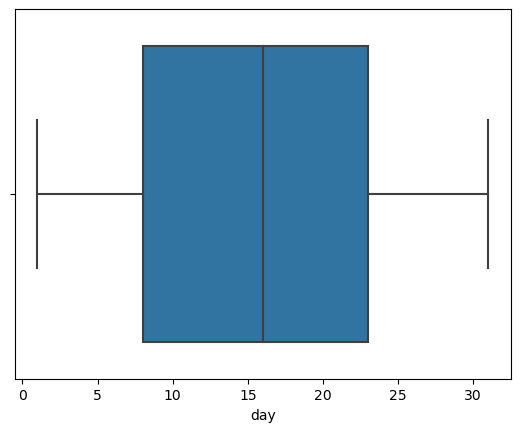

In [213]:
#outliers
for i in num:
    sns.boxplot(data[i])
    plt.show()

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

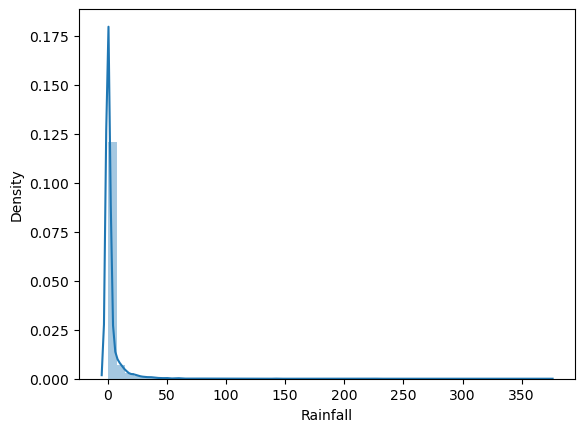

In [214]:
sns.distplot(data['Rainfall'])

In [215]:
data[num].skew()

MinTemp          -0.070098
MaxTemp           0.394841
Rainfall         13.073756
Evaporation      13.998671
Sunshine         -0.822526
WindGustSpeed     0.784800
WindSpeed9am      0.949237
WindSpeed3pm      0.509973
Humidity9am      -0.250378
Humidity3pm       0.118933
Pressure3pm      -0.011625
Cloud9am         -0.261462
Cloud3pm         -0.185359
year              0.421639
month             0.054225
day               0.000577
dtype: float64

In [216]:
for i in num:
    IQR= data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25) - (1.5 * IQR)
    upper=data[i].quantile(.75) + (1.5 * IQR)
    data[i]=np.where(data[i]<lower,lower,data[i])
    data[i]=np.where(data[i]>upper,upper,data[i])

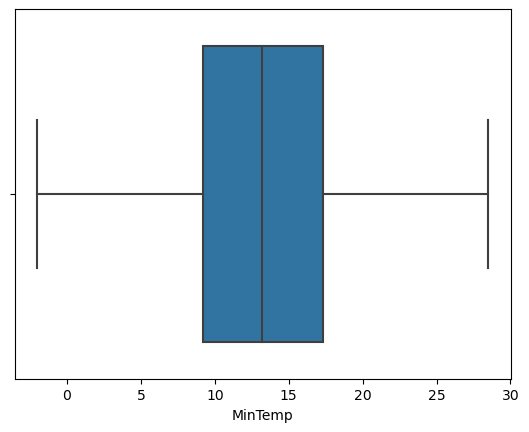

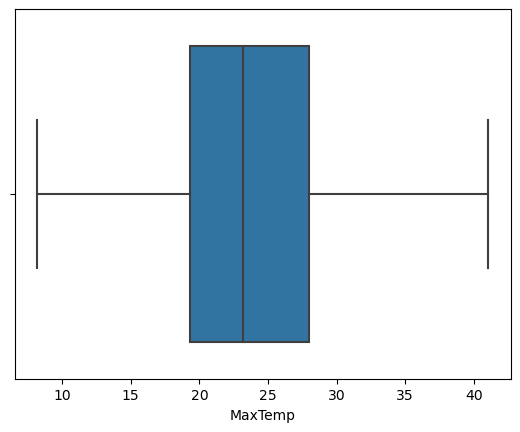

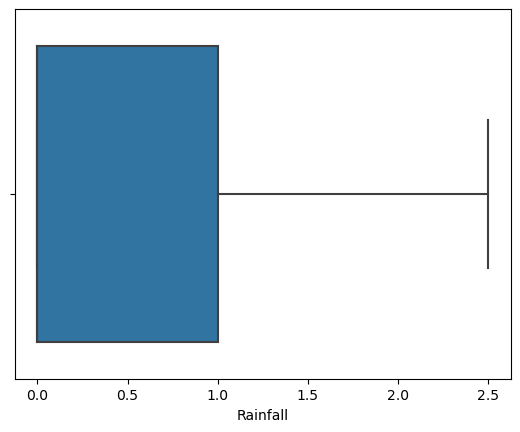

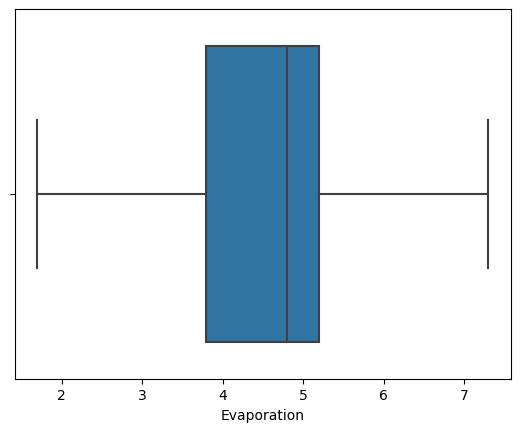

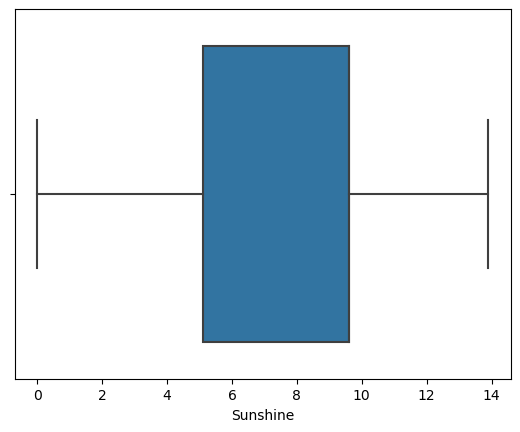

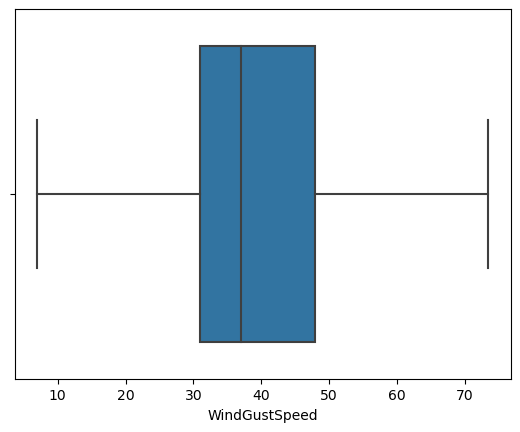

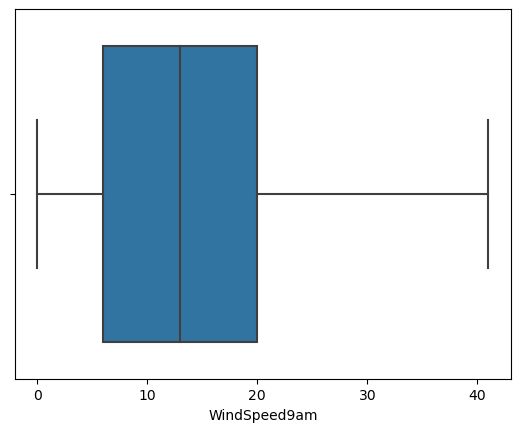

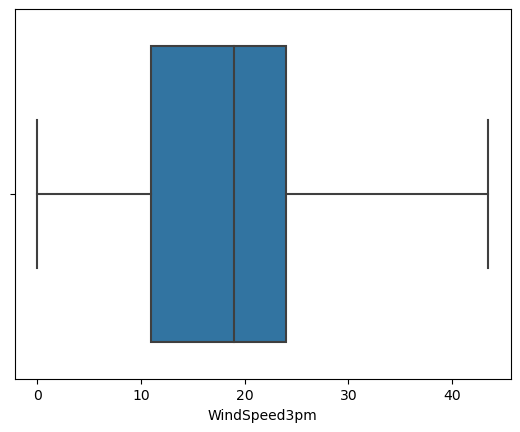

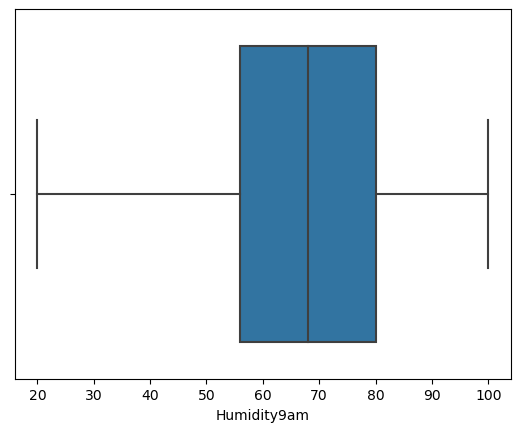

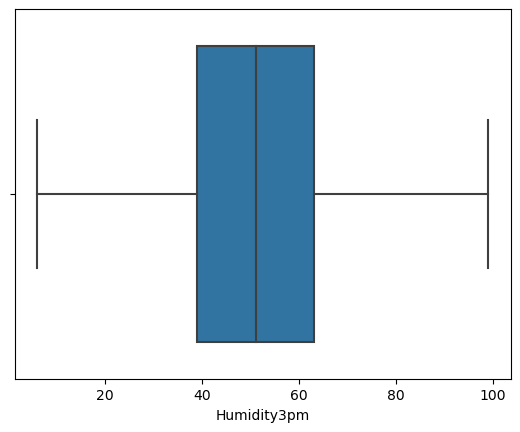

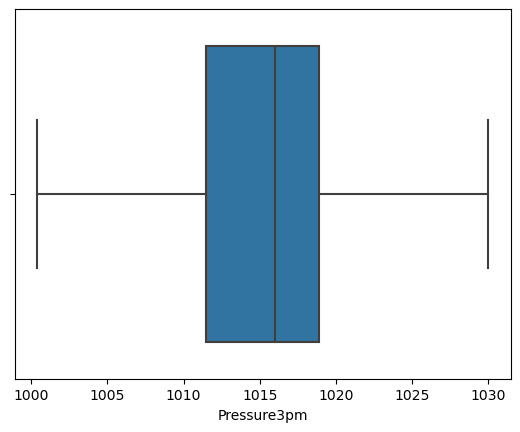

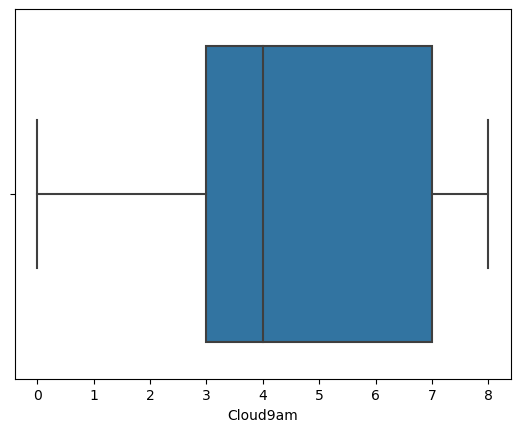

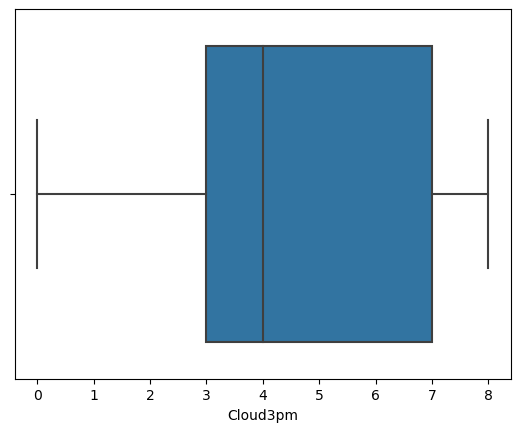

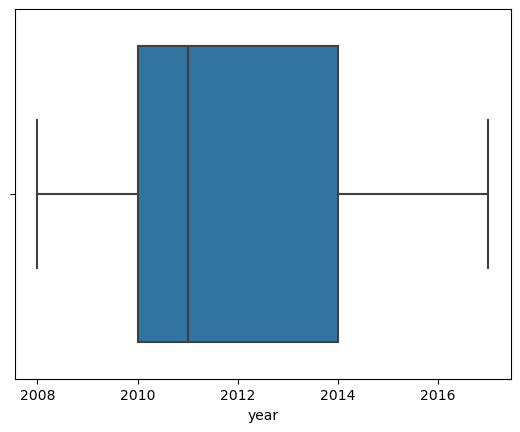

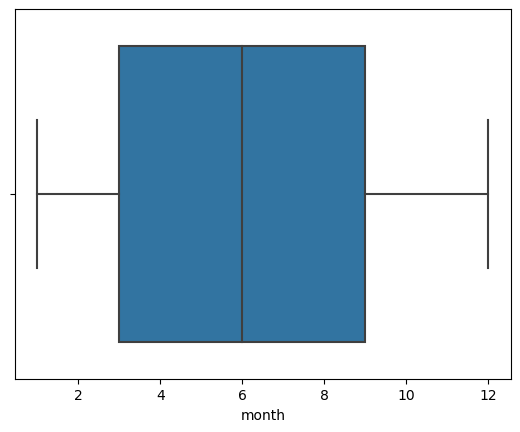

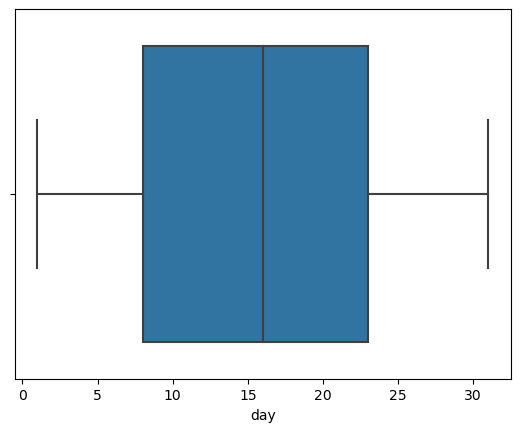

In [217]:
for i in num:
    sns.boxplot(data[i])
    plt.show()

In [218]:
data[num].skew()

MinTemp         -0.070098
MaxTemp          0.372256
Rainfall         1.226519
Evaporation      0.042898
Sunshine        -0.822526
WindGustSpeed    0.556656
WindSpeed9am     0.743355
WindSpeed3pm     0.347722
Humidity9am     -0.235208
Humidity3pm      0.118933
Pressure3pm      0.015165
Cloud9am        -0.261462
Cloud3pm        -0.185359
year             0.421639
month            0.054225
day              0.000577
dtype: float64

In [219]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [220]:
for i in num:
    trans=power_transform(data[num])
    data[i]=sc.fit_transform(trans)

In [221]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,NW,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,ESE,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,ENE,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,NNW,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,E,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018


In [222]:
chitest=data[['Location','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,Albury,NNW,SE,NW,Yes
1,Albury,N,SSE,ESE,Yes
2,Albury,NNE,NE,ENE,Yes
3,Albury,W,NNW,NNW,Yes
4,Albury,ENE,SSW,E,Yes
...,...,...,...,...,...
8181,Uluru,E,ESE,E,No
8182,Uluru,E,SE,ENE,No
8183,Uluru,NNW,SE,N,No
8184,Uluru,N,SE,WNW,No


In [223]:
import numpy as np
### let's perform label encoding on WindGustDir
ordinal_label = {k: i for i, k in enumerate(chitest['WindGustDir'].unique(), 0)}
chitest['WindGustDir'] = chitest['WindGustDir'].map(ordinal_label)

In [224]:
ordinal_label = {k: i for i, k in enumerate(chitest['Location'].unique(), 0)}
chitest['Location'] = chitest['Location'].map(ordinal_label)

In [225]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir9am'].unique(), 0)}
chitest['WindDir9am'] = chitest['WindDir9am'].map(ordinal_label)

In [226]:
ordinal_label = {k: i for i, k in enumerate(chitest['WindDir3pm'].unique(), 0)}
chitest['WindDir3pm'] = chitest['WindDir3pm'].map(ordinal_label)

In [227]:
chitest['RainTomorrow'].replace('No',0,inplace=True)
chitest['RainTomorrow'].replace('Yes',1,inplace=True)

In [228]:
chitest

,Location,WindGustDir,WindDir9am,WindDir3pm,RainTomorrow
0,0,0,0,0,1
1,0,1,1,1,1
2,0,2,2,2,1
3,0,3,3,3,1
4,0,4,4,4,1
...,...,...,...,...,...
8181,11,12,7,4,0
8182,11,12,0,2,0
8183,11,0,0,9,0
8184,11,1,0,5,0


In [229]:
inp=chitest.drop('RainTomorrow',axis=1)
out=chitest['RainTomorrow']

In [230]:
from sklearn.feature_selection import chi2
f_p_values=chi2(inp,out)

In [231]:
f_p_values

(array([34.02791176,  2.63753342, 20.16354411,  0.47166443]),
 array([5.43271338e-09, 1.04365465e-01, 7.10950475e-06, 4.92222447e-01]))

In [232]:
p_values=pd.Series(f_p_values[1])
p_values.index=inp.columns
p_values

Location       5.432713e-09
WindGustDir    1.043655e-01
WindDir9am     7.109505e-06
WindDir3pm     4.922224e-01
dtype: float64

<AxesSubplot:>

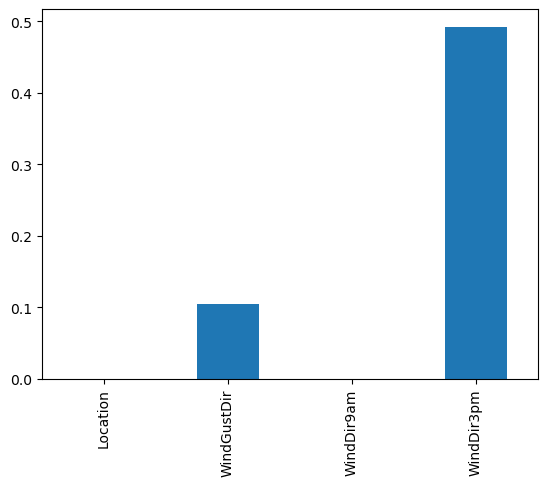

In [233]:
p_values.plot.bar()

In [234]:
16-1 * (2-1 )

15

In [235]:
data.drop('WindDir3pm',axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,year,month,day
0,Albury,-0.630013,-0.642992,-0.642992,-0.642992,-0.642992,NNW,-0.642992,SE,-0.642992,...,-0.642992,-0.642992,-0.642992,-0.642992,-0.642992,No,Yes,-0.642992,-0.642992,-0.642992
1,Albury,0.054150,0.031187,0.031187,0.031187,0.031187,N,0.031187,SSE,0.031187,...,0.031187,0.031187,0.031187,0.031187,0.031187,No,Yes,0.031187,0.031187,0.031187
2,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,NNE,0.498052,NE,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
3,Albury,0.513327,0.498052,0.498052,0.498052,0.498052,W,0.498052,NNW,0.498052,...,0.498052,0.498052,0.498052,0.498052,0.498052,Yes,Yes,0.498052,0.498052,0.498052
4,Albury,0.182945,0.161018,0.161018,0.161018,0.161018,ENE,0.161018,SSW,0.161018,...,0.161018,0.161018,0.161018,0.161018,0.161018,No,Yes,0.161018,0.161018,0.161018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,Uluru,-1.794801,-1.751381,-1.751381,-1.751381,-1.751381,E,-1.751381,ESE,-1.751381,...,-1.751381,-1.751381,-1.751381,-1.751381,-1.751381,No,No,-1.751381,-1.751381,-1.751381
8182,Uluru,-1.928608,-1.876512,-1.876512,-1.876512,-1.876512,E,-1.876512,SE,-1.876512,...,-1.876512,-1.876512,-1.876512,-1.876512,-1.876512,No,No,-1.876512,-1.876512,-1.876512
8183,Uluru,-1.775739,-1.733525,-1.733525,-1.733525,-1.733525,NNW,-1.733525,SE,-1.733525,...,-1.733525,-1.733525,-1.733525,-1.733525,-1.733525,No,No,-1.733525,-1.733525,-1.733525
8184,Uluru,-1.434531,-1.412489,-1.412489,-1.412489,-1.412489,N,-1.412489,SE,-1.412489,...,-1.412489,-1.412489,-1.412489,-1.412489,-1.412489,No,No,-1.412489,-1.412489,-1.412489


In [236]:
data['RainTomorrow'].replace('No',0,inplace=True)
data['RainTomorrow'].replace('Yes',1,inplace=True)

data['RainToday'].replace('No',0,inplace=True)
data['RainToday'].replace('Yes',1,inplace=True)

In [237]:
X=data.drop('RainTomorrow',axis=1)
Y=data['RainTomorrow']

In [238]:
X.shape  , Y.shape

((8079, 21), (8079,))

In [239]:
X=pd.get_dummies(X,drop_first=True)

In [240]:
X.shape , Y.shape

((8079, 73), (8079,))

In [241]:
#balancing the dataset
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)


In [242]:
x.shape , y.shape

((12310, 73), (12310,))

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [244]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=122,test_size=.3)

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [246]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [247]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    #print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)
    
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

,Model,Accuracy,F1 Score
0,LogisticRegression(),76.17,75.20
1,RidgeClassifier(),76.04,74.46
2,DecisionTreeClassifier(),81.26,81.86
3,SVC(),78.91,78.50
4,KNeighborsClassifier(),77.31,80.72
5,"(DecisionTreeClassifier(max_features='auto', r...",85.43,85.11
6,"XGBClassifier(base_score=None, booster=None, c...",84.08,84.48
7,SGDClassifier(),75.68,75.38
8,(DecisionTreeClassifier(random_state=120676296...,85.05,85.26
9,"(DecisionTreeClassifier(max_depth=1, random_st...",72.54,71.88


In [248]:
params = {'n_estimators' : [100,150,200,300,500],
    'max_features' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

In [249]:
from sklearn.model_selection import GridSearchCV

In [250]:
GCV=GridSearchCV(Bag_model,param_grid=params,cv=5,n_jobs=-1,verbose=2)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 2, 3, 4, 5],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [100, 150, 200, 300, 500]},
             verbose=2)

In [251]:
GCV.best_estimator_

BaggingClassifier(max_features=5, max_samples=0.5, n_estimators=500)

In [252]:
GCV.best_params_

{'max_features': 5, 'max_samples': 0.5, 'n_estimators': 500}

In [253]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7784998646087192

<AxesSubplot:>

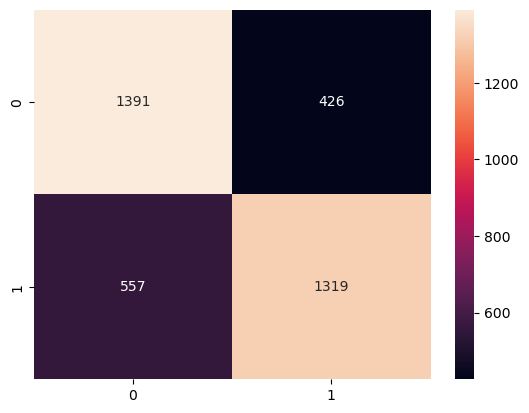

In [254]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

In [255]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

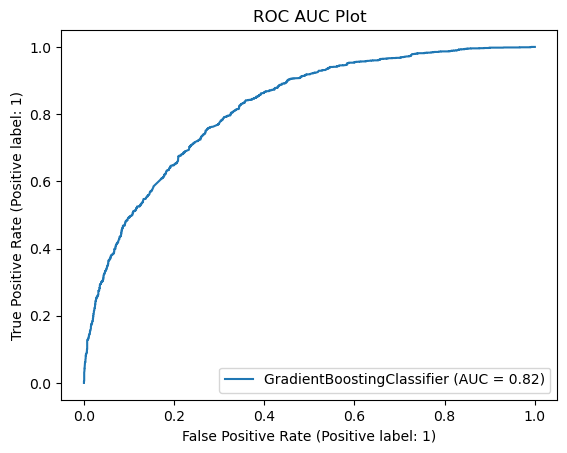

In [256]:
plot_roc_curve(GB_model,x_test,y_test)
plt.title('ROC AUC Plot')

In [257]:
import joblib
joblib.dump(GB_model,"Rainfall_weather_forecasting.pkl")

['Rainfall_weather_forecasting.pkl']

In [275]:
round(d1.isnull().sum()/d1.shape[0]*100,2).sort_values(ascending=False)

Location         0.0
MinTemp          0.0
month            0.0
year             0.0
RainTomorrow     0.0
RainToday        0.0
Cloud3pm         0.0
Cloud9am         0.0
Pressure3pm      0.0
Humidity3pm      0.0
Humidity9am      0.0
WindSpeed3pm     0.0
WindSpeed9am     0.0
WindDir3pm       0.0
WindDir9am       0.0
WindGustSpeed    0.0
WindGustDir      0.0
Sunshine         0.0
Evaporation      0.0
Rainfall         0.0
MaxTemp          0.0
day              0.0
dtype: float64

<AxesSubplot:>

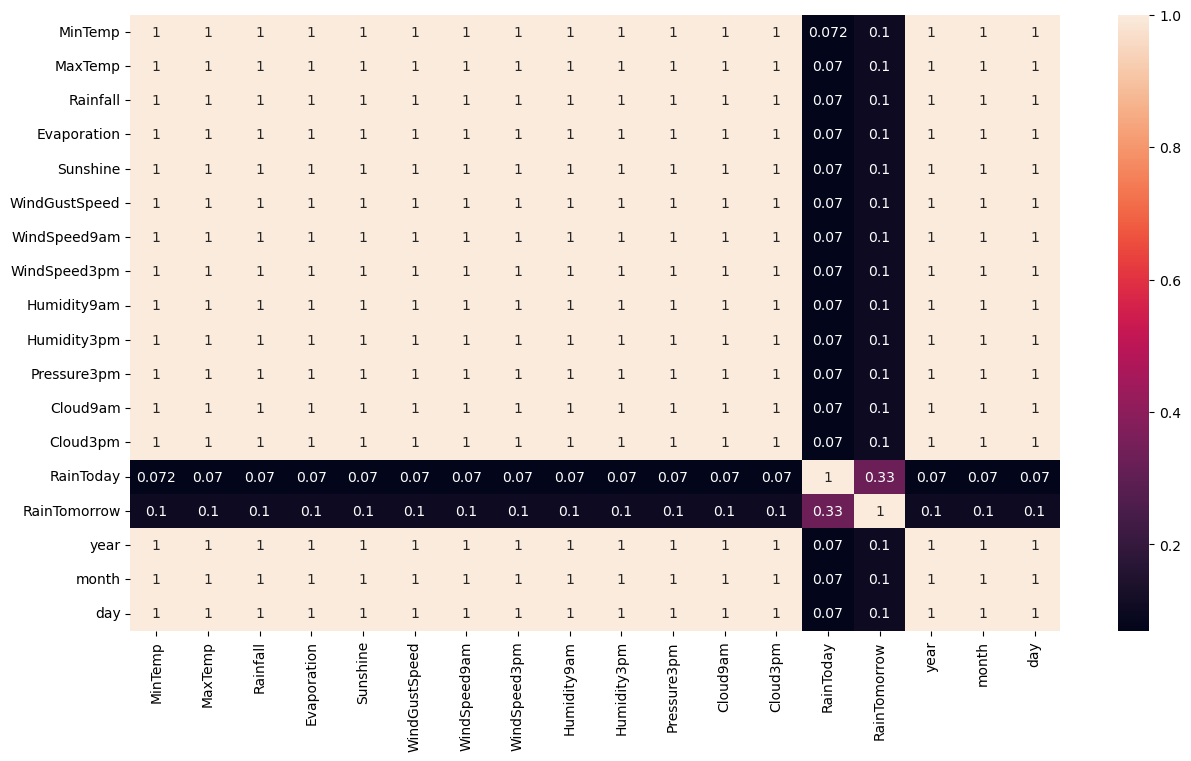

In [276]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

In [277]:
cont= [i for i in d1.columns if d1[i].dtypes!='O']

In [278]:
cont.remove('Rainfall')

In [279]:
cont

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'RainTomorrow',
 'year',
 'month',
 'day']

In [280]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,1627.956071
1,MaxTemp,inf
2,Evaporation,inf
3,Sunshine,inf
4,WindGustSpeed,inf
5,WindSpeed9am,inf
6,WindSpeed3pm,inf
7,Humidity9am,inf
8,Humidity3pm,inf
9,Pressure3pm,inf


In [281]:
cont.remove('MaxTemp')

In [282]:
v=d1[cont]
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(v)
VIF= pd.DataFrame()
VIF['features']=v.columns
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(v.columns))]
VIF

,features,vif
0,MinTemp,1627.956071
1,Evaporation,inf
2,Sunshine,inf
3,WindGustSpeed,inf
4,WindSpeed9am,inf
5,WindSpeed3pm,inf
6,Humidity9am,inf
7,Humidity3pm,inf
8,Pressure3pm,inf
9,Cloud9am,inf


In [284]:
d1.drop(['MaxTemp'],axis=1, inplace=True)

<AxesSubplot:>

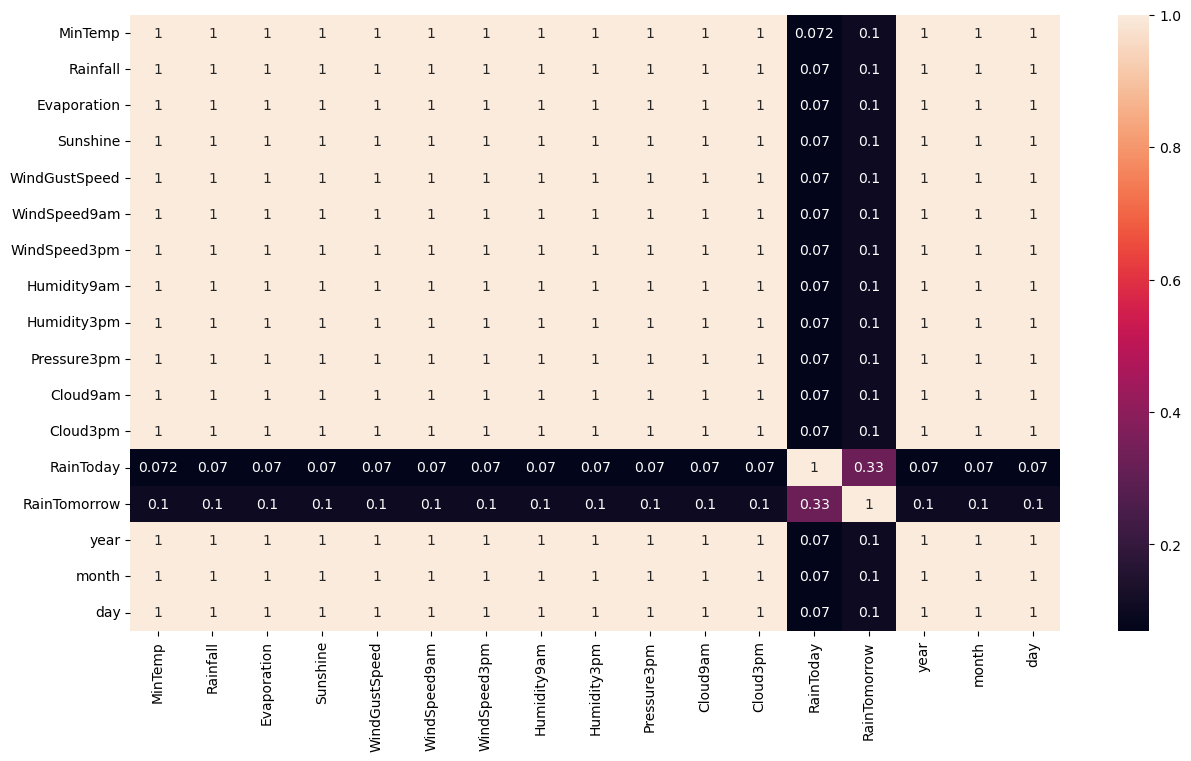

In [285]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True)

In [286]:
X=d1.drop('Rainfall',axis=1)
Y=d1['Rainfall']

In [287]:
cont= [i for i in X.columns if X[i].dtypes!='O']

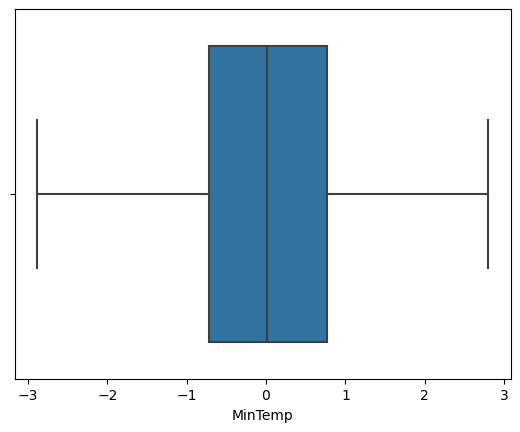

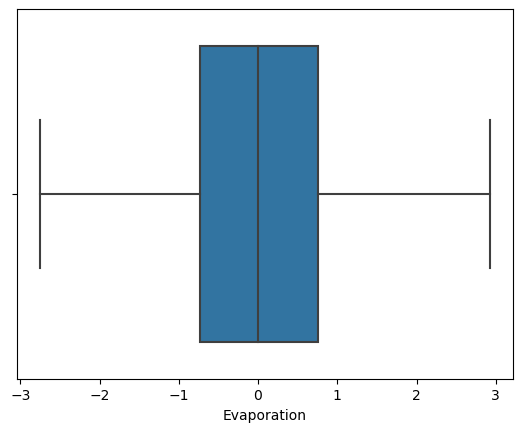

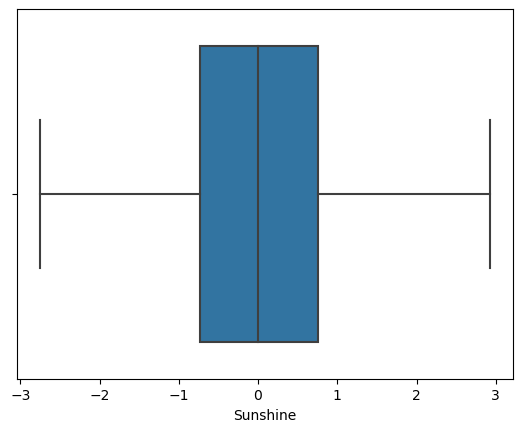

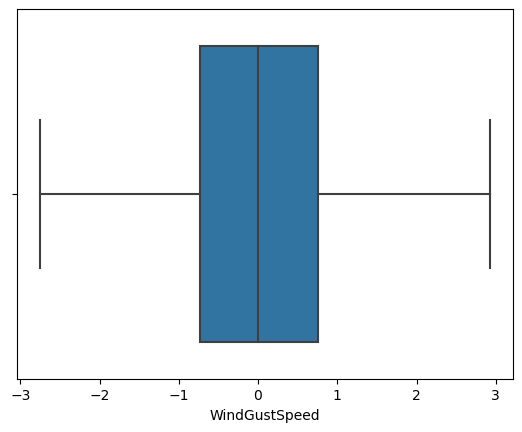

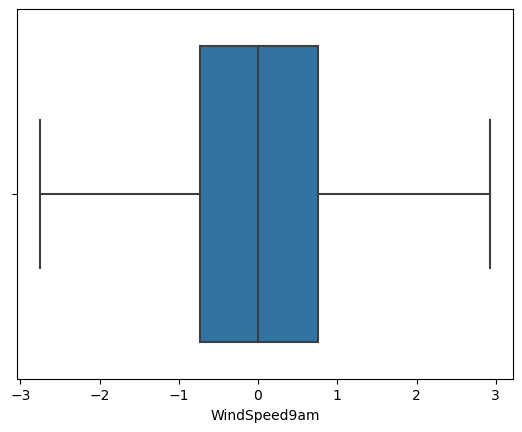

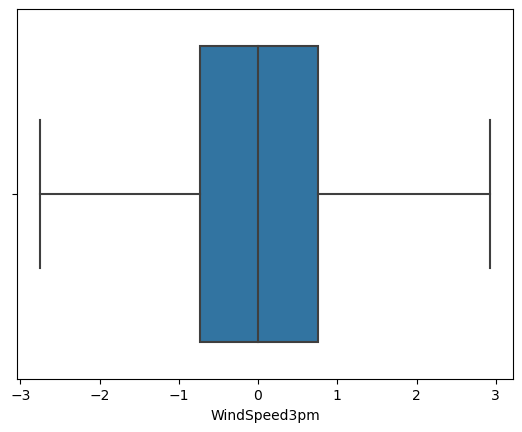

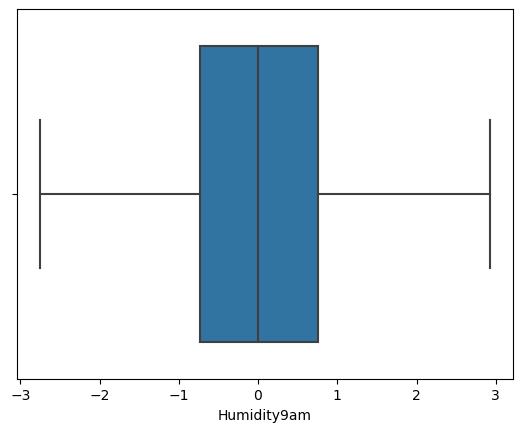

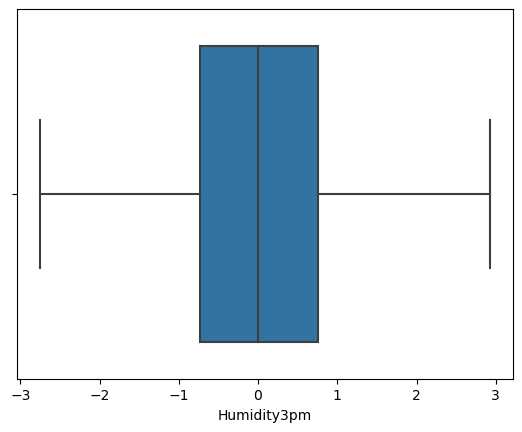

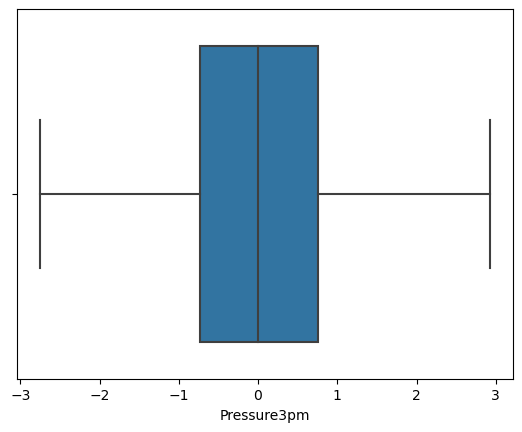

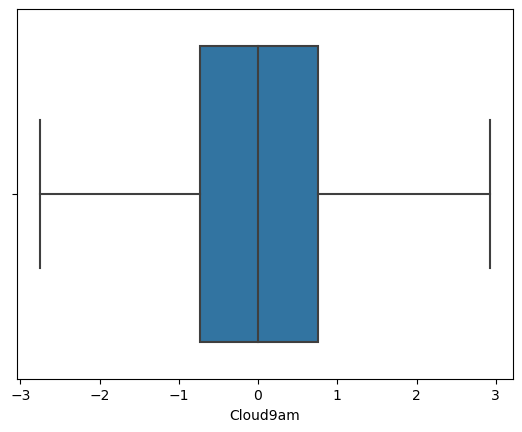

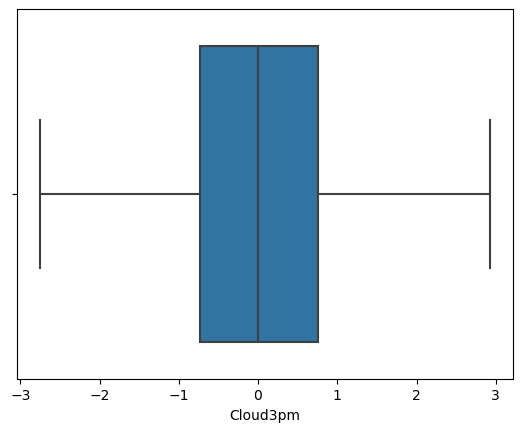

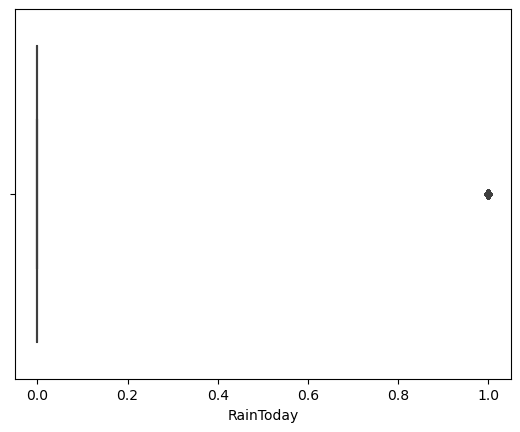

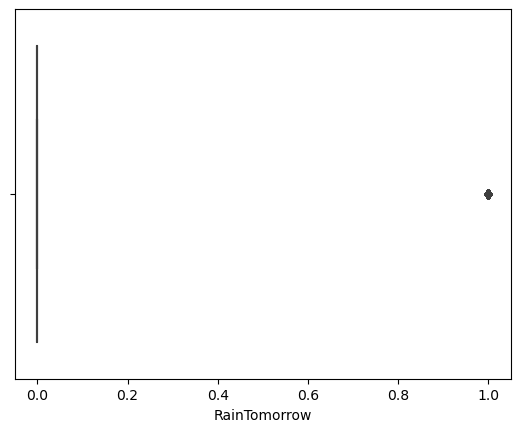

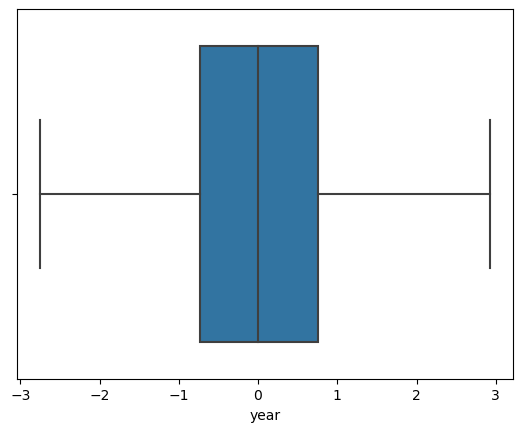

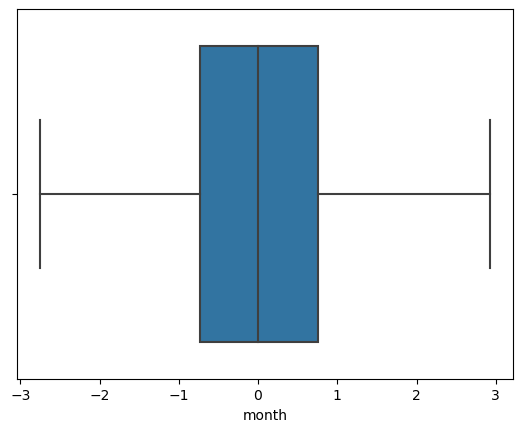

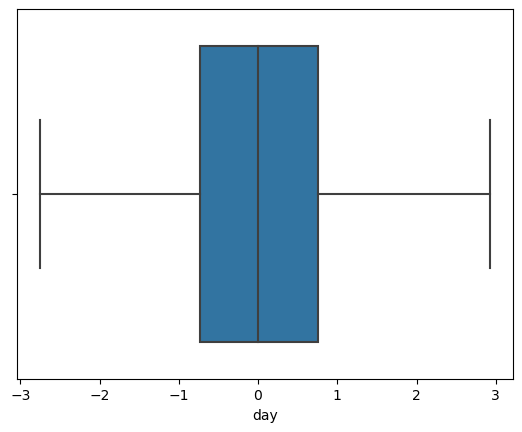

In [288]:
for i in cont:
    sns.boxplot(X[i])
    plt.show()

In [289]:
X[cont].skew()

MinTemp         -0.099928
Evaporation     -0.010778
Sunshine        -0.010778
WindGustSpeed   -0.010778
WindSpeed9am    -0.010778
WindSpeed3pm    -0.010778
Humidity9am     -0.010778
Humidity3pm     -0.010778
Pressure3pm     -0.010778
Cloud9am        -0.010778
Cloud3pm        -0.010778
RainToday        1.201947
RainTomorrow     1.229722
year            -0.010778
month           -0.010778
day             -0.010778
dtype: float64

In [290]:
for i in cont:
    IQR= X[i].quantile(.75)-X[i].quantile(.25)
    lower=X[i].quantile(.25) - (1.5 * IQR)
    upper=X[i].quantile(.75) + (1.5 * IQR)
    X[i]=np.where(X[i]<lower,lower,X[i])
    X[i]=np.where(X[i]>upper,upper,X[i])

In [291]:
X[cont].skew()

MinTemp         -0.099928
Evaporation     -0.010778
Sunshine        -0.010778
WindGustSpeed   -0.010778
WindSpeed9am    -0.010778
WindSpeed3pm    -0.010778
Humidity9am     -0.010778
Humidity3pm     -0.010778
Pressure3pm     -0.010778
Cloud9am        -0.010778
Cloud3pm        -0.010778
RainToday        0.000000
RainTomorrow     0.000000
year            -0.010778
month           -0.010778
day             -0.010778
dtype: float64

In [292]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [293]:
for i in cont:
    trans=power_transform(data[cont])
    X[i]=sc.fit_transform(trans)

In [294]:
X=pd.get_dummies(X,drop_first=True)

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

LR= LinearRegression()

In [297]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=23,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [298]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [299]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [300]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 3.466945772684415e-16
mean_square_error of LinearRegression() model 1.9272511814158675e-31
R2 Score of LinearRegression() model 100.0
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 0.001029665845950686
mean_square_error of Ridge() model 1.7404676750625295e-06
R2 Score of Ridge() model 99.9998185988066
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 0.7900495659816846
mean_square_error of Lasso() model 0.927710010218909
R2 Score of Lasso() model 3.30891783047903
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 0.00013638215746658783
mean_square_error of DecisionTreeRegressor() model 5.818168361855024e-06
R2 Score of DecisionTreeRegressor() model 99.99939359822686
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 0.04770795430290841
mean_square_error of S

In [301]:
from sklearn.model_selection import cross_val_score

In [302]:
for i in model:
    print('Root mean_square of ',i, 'model',np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
    score=cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean()
    print("cross Validation score of root mean square ",i ," is ",np.sqrt(-score))
    print('*'*50)


Root mean_square of  LinearRegression() model 4.390046903412158e-16
cross Validation score of root mean square  LinearRegression()  is  3.92393786998155e-05
**************************************************
Root mean_square of  Ridge() model 0.0013192678556921372
cross Validation score of root mean square  Ridge()  is  0.001428903951377379
**************************************************
Root mean_square of  Lasso() model 0.9631770399147339
cross Validation score of root mean square  Lasso()  is  0.9976396053818987
**************************************************
Root mean_square of  DecisionTreeRegressor() model 0.0024120879672713067
cross Validation score of root mean square  DecisionTreeRegressor()  is  0.006828493437901518
**************************************************
Root mean_square of  SVR() model 0.05751422562443489
cross Validation score of root mean square  SVR()  is  0.06561590390562783
**************************************************
Root mean_square of  KNeighb

In [303]:
#hyper parameter tuning
n_estimator= [200, 400, 600, 800, 1000]  # no of tree in Random forest, default is 100
max_features= ['auto','sqrt','log2']  # mini no of features to create Decission Tree
max_depth=[10, 64, 118, 173, 227, 282, 336]  #  Max depth of decision tree
min_samples_split= [1,2,3]   # mini no of sample rerquired to split node
min_samples_leaf= [1,3,4,6,7,9]  #mini no of sample required at each leaf node

param_grid= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }
param_grid

{'n_estimators': [200, 400, 600, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 64, 118, 173, 227, 282, 336],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 3, 4, 6, 7, 9]}

In [304]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [305]:
grid_search=RandomizedSearchCV(estimator=RFR_model,param_distributions=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [306]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=282, max_features='log2', min_samples_leaf=3,
                      n_estimators=1000)

In [307]:
grid_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 282}

In [308]:
GCV_pred=grid_search.best_estimator_.predict(x_test)

np.sqrt(mean_squared_error(y_test,GCV_pred))

0.006676358902188779

In [309]:
import joblib
joblib.dump(grid_search.best_estimator_,"Rainfall_weather_prediction_in_mm.pkl")

['Rainfall_weather_prediction_in_mm.pkl']